# Mentoría 7, Trabajo Práctico N° 3 - Grupo 2

Benitez, Macarena<br>
Castro Luna, Eduardo<br>
Gutierrez, Federico<br>
Wolowski, Mauro

## Tabla de Contenidos

0. [Importación de librerías y datasets](#0.-Importaci%C3%B3n-de-librer%C3%ADas-y-datasets)
1. [Visualización de los datasets](#1.-Visualizaci%C3%B3n-de-los-datasets)
    1. [Visualización rápida de una muestra de cada dataset](#1.A.-Visualizaci%C3%B3n-r%C3%A1pida-de-una-muestra-de-cada-dataset)
    2. [Tipos de datos](#1.B.-Tipos-de-datos)
    3. [Estructura de datos faltantes](#1.C.-Estructura-de-datos-faltantes)
    4. [Valores outliers](#1.D.-Valores-outliers)
3. [Preparación de Dataset](#preparacion)
    1. [División de datasets en train, valid y test](#division_dataset)
    2. [Codificación de Variables Categóricas](#encoding)
    3. [Valores Faltantes](#faltantes)
        1. [Creación de versión A de los datasets (sin columna smoking_history)](#datasets_A)
        2. [Creación de versión B de los datasets (imputando columna smoking_history)](#datasets_B)
    4. [Descarte de Columnas: Importancia y Correlación](#descartes_columnas)
    5. [Estandarización y Escaleo](#estandarizacion_y_escaleo)
4. [Modelos de Clasificación](#modelos)
    1. [Ajuste de hiperparámetros de los modelos](#modelos)
5. [Generar la salida para entregar](#entrega)

## 0. Importación de librerías y datasets

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from missingno import matrix

In [2]:
## Importamos los datasets A

# Etiquetas
y_A_train = pd.read_csv("./A_sets/y_train_inicial.csv")
y_A_test = pd.read_csv("./A_sets/y_test_inicial.csv")
# Datos sin escalear ni estandarizar
X_A_train = pd.read_csv("./A_sets/x_train_post_cat_encoding.csv")
X_A_test = pd.read_csv("./A_sets/x_test_post_cat_encoding.csv")
# Datos escaleados
X_A_train_scaled = pd.read_csv("./A_sets/x_A_train_norm.csv")
X_A_test_scaled = pd.read_csv("./A_sets/x_A_test_norm.csv")
# Datos estandarizados
X_A_train_std = pd.read_csv("./A_sets/x_A_train_std.csv")
X_A_test_std = pd.read_csv("./A_sets/x_A_test_std.csv")

In [3]:
## Importamos los datasets B

# Etiquetas
y_B_train = pd.read_csv("./B_sets/y_train_inicial.csv")
y_B_test = pd.read_csv("./B_sets/y_test_inicial.csv")
# Datos sin escalear ni estandarizar
X_B_train = pd.read_csv("./B_sets/x_train_post_cat_encoding.csv")
X_B_test = pd.read_csv("./B_sets/x_test_post_cat_encoding.csv")
# Datos escaleados
X_B_train_scaled = pd.read_csv("./B_sets/x_B_train_norm.csv")
X_B_test_scaled = pd.read_csv("./B_sets/x_B_test_norm.csv")
# Datos estandarizados
X_B_train_std = pd.read_csv("./B_sets/x_B_train_std.csv")
X_B_test_std = pd.read_csv("./B_sets/x_B_test_std.csv")

## 1. Visualización de los datasets

Realizamos una rápida visualización de los datasets para verificar que estén en condiciones de ser usados por los modelos a ensayar.

Iniciamos creando copias de los dataframes de datos de entradas con los datos de y_train e y_test añadidos como columnas, para visualizar también los valores de la variable objetivo.

In [4]:
## Creamos copias de los datasets A añadiendo a cada uno las correspondientes etiquetas
## (sólo para las visualizaciones)

# Datos sin escalear ni estandarizar
X_A_train_vis = pd.concat([X_A_train, y_A_train], axis=1)
X_A_test_vis = pd.concat([X_A_test, y_A_test], axis=1)
# Datos escaleados
X_A_train_scaled_vis = pd.concat([X_A_train_scaled, y_A_train], axis=1)
X_A_test_scaled_vis = pd.concat([X_A_test_scaled, y_A_test], axis=1)
# Datos estandarizados
X_A_train_std_vis = pd.concat([X_A_train_std, y_A_train], axis=1)
X_A_test_std_vis = pd.concat([X_A_test_std, y_A_test], axis=1)

In [5]:
## Creamos copias de los datasets B añadiendo a cada uno las correspondientes etiquetas
## (sólo para las visualizaciones)

# Datos sin escalear ni estandarizar
X_B_train_vis = pd.concat([X_B_train, y_B_train], axis=1)
X_B_test_vis = pd.concat([X_B_test, y_B_test], axis=1)
# Datos escaleados
X_B_train_scaled_vis = pd.concat([X_B_train_scaled, y_B_train], axis=1)
X_B_test_scaled_vis = pd.concat([X_B_test_scaled, y_B_test], axis=1)
# Datos estandarizados
X_B_train_std_vis = pd.concat([X_B_train_std, y_B_train], axis=1)
X_B_test_std_vis = pd.concat([X_B_test_std, y_B_test], axis=1)

In [6]:
## Diccionario con todos los datasets
datasets_A = {
    'train A sin escalar ni estandarizar' : X_A_train_vis,
    'train A escalado' : X_A_train_scaled_vis,
    'train A estandarizado' : X_A_train_std_vis,
    'test A sin escalar ni estandarizar' : X_A_test_vis,
    'test A escalado' : X_A_test_scaled_vis,
    'test A estandarizado' : X_A_test_std_vis}
datasets_B = {
    'train B sin escalar ni estandarizar' : X_B_train_vis,
    'train B escalado' : X_B_train_scaled_vis,
    'train B estandarizado' : X_B_train_std_vis,
    'test B sin escalar ni estandarizar' : X_B_test_vis,
    'test B escalado' : X_B_test_scaled_vis,
    'test B estandarizado' : X_B_test_std_vis
}
datasets = datasets_A | datasets_B

### 1.A. Visualización rápida de una muestra de cada dataset

In [7]:
## Visualizamos una muestra aleatoria de los datos
for name, dataset in datasets.items():
    print(f"Dataset {name}:")
    display(dataset.sample(10, random_state=0))
    print("=======================================================================================")

Dataset train A sin escalar ni estandarizar:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,20.942857,25.000000,6.092857,7.878571,6835.714286,3430.0,...,45.000000,0.0,63997.0,3.737500e+04,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,25.900000,24.000000,5.280000,6.690000,15000.000000,3200.0,...,24.000000,0.0,446949.0,1.448340e+05,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,17.000000,15.000000,4.240000,7.840000,15000.000000,6800.0,...,40.000000,0.0,63997.0,3.737500e+04,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,28.700000,30.000000,8.530000,6.950000,5200.000000,4500.0,...,24.000000,0.0,297282.0,2.755280e+05,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,23.800000,20.785714,7.900000,7.600000,3000.000000,230.0,...,10.000000,0.0,3121707.0,3.049672e+06,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,22.000000,20.000000,1.600000,7.450000,18000.000000,16000.0,...,38.700000,0.0,301968.0,2.490003e+05,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,15.000000,11.000000,7.580000,7.420000,7000.000000,2000.0,...,25.514286,70.0,633391.0,4.690080e+05,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,21.000000,25.000000,2.980000,6.490000,1000.000000,400.0,...,24.000000,0.0,446949.0,1.448340e+05,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,23.500000,26.000000,9.050000,7.870000,2250.000000,500.0,...,50.000000,0.0,358712.0,2.677600e+05,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,13.500000,11.000000,9.400000,7.500000,20000.000000,3000.0,...,24.000000,0.0,282281.0,2.738630e+05,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset train A escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,0.622449,0.724138,0.338475,0.545344,0.009764,0.028567,...,0.195612,0.000000,0.000000,0.000000,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,0.843750,0.689655,0.291786,0.292994,0.021427,0.026650,...,0.099634,0.000000,0.125241,0.035673,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,0.446429,0.379310,0.232051,0.537155,0.021427,0.056651,...,0.172761,0.000000,0.000000,0.000000,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,0.968750,0.896552,0.478461,0.348195,0.007427,0.037484,...,0.099634,0.000000,0.076294,0.079060,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,0.750000,0.578818,0.442275,0.486200,0.004284,0.001900,...,0.035649,0.000000,1.000000,1.000000,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,0.669643,0.551724,0.080414,0.454352,0.025713,0.133319,...,0.166819,0.000000,0.077827,0.070254,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,0.357143,0.241379,0.423894,0.447983,0.009999,0.016650,...,0.106555,0.205882,0.186216,0.143290,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,0.625000,0.724138,0.159678,0.250531,0.001427,0.003317,...,0.099634,0.000000,0.125241,0.035673,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,0.736607,0.758621,0.508329,0.543524,0.003213,0.004150,...,0.218464,0.000000,0.096384,0.076482,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,0.290179,0.241379,0.528432,0.464968,0.028570,0.024984,...,0.099634,0.000000,0.071388,0.078508,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset train A estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,0.290389,1.080031,-0.096146,0.490121,-0.291725,-0.162569,...,0.226137,-0.238749,-0.613072,-0.483594,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,1.315658,0.915833,-0.382337,-1.222677,-0.153064,-0.179157,...,-0.413612,-0.238749,-0.069464,-0.331755,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,-0.525099,-0.561951,-0.748502,0.434537,-0.153064,0.080481,...,0.073816,-0.238749,-0.613072,-0.483594,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,1.894772,1.901023,0.761926,-0.848003,-0.319505,-0.085399,...,-0.413612,-0.238749,-0.281919,-0.147085,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,0.881322,0.388053,0.540115,0.088684,-0.356869,-0.393359,...,-0.840111,-0.238749,3.727410,3.772767,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,0.509034,0.259040,-1.677996,-0.127475,-0.102113,0.744002,...,0.034212,-0.238749,-0.275267,-0.184569,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,-0.938753,-1.218744,0.427449,-0.170706,-0.288934,-0.265704,...,-0.367480,2.012141,0.195195,0.126301,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,0.302207,1.080031,-1.192124,-1.510889,-0.390837,-0.381098,...,-0.413612,-0.238749,-0.069464,-0.331755,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,0.819274,1.244230,0.945008,0.477769,-0.369607,-0.373886,...,0.378458,-0.238749,-0.194718,-0.158061,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,-1.248993,-1.218744,1.068237,-0.055422,-0.068145,-0.193582,...,-0.413612,-0.238749,-0.303213,-0.149438,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset test A sin escalar ni estandarizar:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,22.6,23.0,7.100000,5.70,2957.571429,6700.0,...,44.200000,0.000000,633391.0,469008.0,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,15.7,14.5,8.140000,7.03,14000.000000,4400.0,...,23.000000,0.985714,297282.0,275528.0,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,24.0,20.0,3.190000,6.82,900.000000,800.0,...,63.100000,0.000000,297282.0,275528.0,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,14.5,7.0,9.290000,7.29,12000.000000,50.0,...,29.000000,23.571429,633391.0,469008.0,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,22.0,25.0,2.620000,6.49,2000.000000,400.0,...,11.000000,0.000000,446949.0,144834.0,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,9.0,11.0,7.357143,8.44,1300.000000,200.0,...,28.000000,0.000000,100930.0,47630.0,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,16.3,16.0,5.700000,5.00,740000.000000,15.0,...,19.000000,0.000000,171616.0,157308.0,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,14.5,11.0,8.650000,7.47,6000.000000,1000.0,...,24.514286,50.000000,633391.0,469008.0,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,24.0,27.0,4.280000,7.47,80000.000000,1500.0,...,5.900000,0.000000,100930.0,47630.0,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,23.0,25.0,5.800000,6.92,440.000000,300.0,...,140.000000,0.000000,446949.0,144834.0,2024.0,0.0,0.0,1.0,39.0,61.0


Dataset test A escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,0.696429,0.655172,0.396324,0.082803,0.004224,0.055818,...,0.191956,0.000000,0.186216,0.143290,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,0.388393,0.362069,0.456060,0.365180,0.019999,0.036651,...,0.095064,0.002899,0.076294,0.079060,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,0.758929,0.551724,0.171740,0.320594,0.001284,0.006650,...,0.278336,0.000000,0.076294,0.079060,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,0.334821,0.103448,0.522114,0.420382,0.017141,0.000400,...,0.122486,0.069328,0.186216,0.143290,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,0.669643,0.724138,0.139001,0.250531,0.002856,0.003317,...,0.040219,0.000000,0.125241,0.035673,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,0.089286,0.241379,0.411094,0.664544,0.001856,0.001650,...,0.117916,0.000000,0.012079,0.003404,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,0.415179,0.413793,0.315910,-0.065817,1.057143,0.000108,...,0.076782,0.000000,0.035196,0.039814,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,0.334821,0.241379,0.485353,0.458599,0.008570,0.008317,...,0.101985,0.147059,0.186216,0.143290,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,0.758929,0.793103,0.234348,0.458599,0.114284,0.012484,...,0.016910,0.000000,0.012079,0.003404,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,0.714286,0.724138,0.321654,0.341826,0.000627,0.002483,...,0.629799,0.000000,0.125241,0.035673,2024.0,0.0,0.0,1.0,39.0,61.0


Dataset test A estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,0.633130,0.751635,0.258450,-2.649323,-0.357590,0.073269,...,0.201765,-0.238749,0.195195,0.126301,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,-0.793974,-0.644050,0.624615,-0.732718,-0.170048,-0.092611,...,-0.444076,-0.207053,-0.281919,-0.147085,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,0.922687,0.259040,-1.118187,-1.035340,-0.392535,-0.352250,...,0.777539,-0.238749,-0.281919,-0.147085,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,-1.042166,-1.875537,1.029508,-0.358044,-0.204016,-0.406341,...,-0.261291,0.519204,0.195195,0.126301,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,0.509034,1.080031,-1.318873,-1.510889,-0.373853,-0.381098,...,-0.809647,-0.238749,-0.069464,-0.331755,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,-2.179713,-1.218744,0.348985,1.299171,-0.385742,-0.395523,...,-0.291755,-0.238749,-0.560645,-0.469104,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,-0.669878,-0.397753,-0.234463,-3.658062,12.160169,-0.408865,...,-0.565933,-0.238749,-0.460304,-0.314129,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,-1.042166,-1.218744,0.804176,-0.098653,-0.305918,-0.337825,...,-0.397945,1.369029,0.195195,0.126301,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,0.922687,1.408428,-0.734418,-0.098653,0.950881,-0.301765,...,-0.965015,-0.238749,-0.560645,-0.469104,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,0.715860,1.080031,-0.199255,-0.891234,-0.400348,-0.388311,...,3.120238,-0.238749,-0.069464,-0.331755,2024.0,0.0,0.0,1.0,39.0,61.0


Dataset train B sin escalar ni estandarizar:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,20.942857,25.000000,6.092857,7.878571,6835.714286,3430.0,...,3.100000,45.000000,0.0,63997.0,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,25.900000,24.000000,5.280000,6.690000,15000.000000,3200.0,...,3.300000,24.000000,0.0,446949.0,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,17.000000,15.000000,4.240000,7.840000,15000.000000,6800.0,...,7.957143,40.000000,0.0,63997.0,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,28.700000,30.000000,8.530000,6.950000,5200.000000,4500.0,...,2.500000,24.000000,0.0,297282.0,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,23.800000,20.785714,7.900000,7.600000,3000.000000,230.0,...,5.200000,10.000000,0.0,3121707.0,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,22.000000,20.000000,1.600000,7.450000,18000.000000,16000.0,...,11.000000,38.700000,0.0,301968.0,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,15.000000,11.000000,7.580000,7.420000,7000.000000,2000.0,...,7.000000,25.514286,70.0,633391.0,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,21.000000,25.000000,2.980000,6.490000,1000.000000,400.0,...,3.914286,24.000000,0.0,446949.0,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,23.500000,26.000000,9.050000,7.870000,2250.000000,500.0,...,6.000000,50.000000,0.0,358712.0,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,13.500000,11.000000,9.400000,7.500000,20000.000000,3000.0,...,4.000000,24.000000,0.0,282281.0,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset train B escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,0.622449,0.724138,0.338475,0.545344,0.009764,0.028567,...,0.054299,0.195612,0.000000,0.000000,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,0.843750,0.689655,0.291786,0.292994,0.021427,0.026650,...,0.063348,0.099634,0.000000,0.125241,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,0.446429,0.379310,0.232051,0.537155,0.021427,0.056651,...,0.274079,0.172761,0.000000,0.000000,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,0.968750,0.896552,0.478461,0.348195,0.007427,0.037484,...,0.027149,0.099634,0.000000,0.076294,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,0.750000,0.578818,0.442275,0.486200,0.004284,0.001900,...,0.149321,0.035649,0.000000,1.000000,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,0.669643,0.551724,0.080414,0.454352,0.025713,0.133319,...,0.411765,0.166819,0.000000,0.077827,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,0.357143,0.241379,0.423894,0.447983,0.009999,0.016650,...,0.230769,0.106555,0.205882,0.186216,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,0.625000,0.724138,0.159678,0.250531,0.001427,0.003317,...,0.091144,0.099634,0.000000,0.125241,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,0.736607,0.758621,0.508329,0.543524,0.003213,0.004150,...,0.185520,0.218464,0.000000,0.096384,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,0.290179,0.241379,0.528432,0.464968,0.028570,0.024984,...,0.095023,0.099634,0.000000,0.071388,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset train B estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
261,0.0,0.0,0.0,0.0,0.288570,1.080598,-0.087577,0.500986,-0.292363,-0.162320,...,-0.735887,0.225480,-0.238146,-0.613072,2022.0,0.0,0.0,1.0,19.0,55.0
122,0.0,1.0,0.0,1.0,1.314259,0.916366,-0.374298,-1.223233,-0.153720,-0.178911,...,-0.670214,-0.414347,-0.238146,-0.069464,2023.0,0.0,0.0,1.0,34.0,34.0
60,0.0,0.0,0.0,0.0,-0.527252,-0.561720,-0.741139,0.445032,-0.153720,0.080773,...,0.859026,0.073140,-0.238146,-0.613072,2023.0,1.0,0.0,0.0,22.0,34.0
232,0.0,0.0,0.0,0.0,1.893610,1.901757,0.772080,-0.846060,-0.320140,-0.085136,...,-0.932905,-0.414347,-0.238146,-0.281919,2023.0,0.0,0.0,1.0,30.0,40.0
135,0.0,0.0,0.0,0.0,0.879745,0.388478,0.549859,0.096872,-0.357499,-0.393151,...,-0.046321,-0.840899,-0.238146,3.727410,2021.0,0.0,1.0,0.0,17.0,52.0
300,0.0,1.0,0.0,1.0,0.507305,0.259439,-1.672350,-0.120728,-0.102775,0.744410,...,1.858192,0.033532,-0.238146,-0.275267,2024.0,0.0,0.0,1.0,0.0,30.0
229,0.0,0.0,0.0,0.0,-0.941075,-1.218648,0.436985,-0.164248,-0.289573,-0.265473,...,0.544734,-0.368210,2.013243,0.195195,2021.0,1.0,0.0,0.0,26.0,48.0
239,0.0,0.0,0.0,1.0,0.300393,1.080598,-1.185580,-1.513366,-0.391463,-0.380888,...,-0.468504,-0.414347,-0.238146,-0.069464,2023.0,0.0,1.0,0.0,33.0,33.0
225,0.0,0.0,0.0,0.0,0.817672,1.244830,0.955500,0.488552,-0.370236,-0.373674,...,0.216370,0.377820,-0.238146,-0.194718,2021.0,0.0,0.0,1.0,13.0,51.0
102,0.0,0.0,0.0,0.0,-1.251442,-1.218648,1.078956,-0.048194,-0.068812,-0.193338,...,-0.440359,-0.414347,-0.238146,-0.303213,2021.0,0.0,0.0,0.0,41.0,44.0


Dataset test B sin escalar ni estandarizar:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,22.6,23.0,7.100000,5.70,2957.571429,6700.0,...,4.000000,44.200000,0.000000,633391.0,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,15.7,14.5,8.140000,7.03,14000.000000,4400.0,...,5.500000,23.000000,0.985714,297282.0,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,24.0,20.0,3.190000,6.82,900.000000,800.0,...,4.357143,63.100000,0.000000,297282.0,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,14.5,7.0,9.290000,7.29,12000.000000,50.0,...,6.600000,29.000000,23.571429,633391.0,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,22.0,25.0,2.620000,6.49,2000.000000,400.0,...,4.328571,11.000000,0.000000,446949.0,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,9.0,11.0,7.357143,8.44,1300.000000,200.0,...,5.700000,28.000000,0.000000,100930.0,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,16.3,16.0,5.700000,5.00,740000.000000,15.0,...,10.000000,19.000000,0.000000,171616.0,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,14.5,11.0,8.650000,7.47,6000.000000,1000.0,...,8.900000,24.514286,50.000000,633391.0,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,24.0,27.0,4.280000,7.47,80000.000000,1500.0,...,6.300000,5.900000,0.000000,100930.0,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,23.0,25.0,5.800000,6.92,440.000000,300.0,...,3.614286,140.000000,0.000000,446949.0,2024.0,0.0,0.0,1.0,39.0,61.0


Dataset test B escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,0.696429,0.655172,0.396324,0.082803,0.004224,0.055818,...,0.095023,0.191956,0.000000,0.186216,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,0.388393,0.362069,0.456060,0.365180,0.019999,0.036651,...,0.162896,0.095064,0.002899,0.076294,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,0.758929,0.551724,0.171740,0.320594,0.001284,0.006650,...,0.111183,0.278336,0.000000,0.076294,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,0.334821,0.103448,0.522114,0.420382,0.017141,0.000400,...,0.212670,0.122486,0.069328,0.186216,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,0.669643,0.724138,0.139001,0.250531,0.002856,0.003317,...,0.109890,0.040219,0.000000,0.125241,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,0.089286,0.241379,0.411094,0.664544,0.001856,0.001650,...,0.171946,0.117916,0.000000,0.012079,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,0.415179,0.413793,0.315910,-0.065817,1.057143,0.000108,...,0.366516,0.076782,0.000000,0.035196,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,0.334821,0.241379,0.485353,0.458599,0.008570,0.008317,...,0.316742,0.101985,0.147059,0.186216,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,0.758929,0.793103,0.234348,0.458599,0.114284,0.012484,...,0.199095,0.016910,0.000000,0.012079,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,0.714286,0.724138,0.321654,0.341826,0.000627,0.002483,...,0.077569,0.629799,0.000000,0.125241,2024.0,0.0,0.0,1.0,39.0,61.0


Dataset test B estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
26,0.0,1.0,0.0,1.0,0.631451,0.752135,0.267674,-2.659392,-0.358220,0.073559,...,-0.440359,0.201106,-0.238146,0.195195,2024.0,0.0,1.0,0.0,26.0,41.0
92,0.0,0.0,0.0,0.0,-0.796237,-0.643836,0.634514,-0.730007,-0.170702,-0.092350,...,0.052188,-0.444815,-0.206443,-0.281919,2021.0,0.0,0.0,0.0,30.0,41.0
2,0.0,0.0,0.0,0.0,0.921127,0.259439,-1.111507,-1.034647,-0.393161,-0.352034,...,-0.323086,0.776950,-0.238146,-0.281919,2024.0,0.0,0.0,1.0,-1.0,53.0
55,0.0,0.0,0.0,1.0,-1.044530,-1.875575,1.040156,-0.352834,-0.204665,-0.406135,...,0.413389,-0.262007,0.519975,0.195195,2021.0,0.0,0.0,0.0,24.0,49.0
91,0.0,0.0,0.0,1.0,0.507305,1.080598,-1.312564,-1.513366,-0.374481,-0.380888,...,-0.332467,-0.810431,-0.238146,-0.069464,2023.0,0.0,1.0,0.0,36.0,35.0
84,0.0,0.0,0.0,0.0,-2.182543,-1.218648,0.358376,1.315431,-0.386368,-0.395315,...,0.117861,-0.292475,-0.238146,-0.560645,2022.0,0.0,0.0,0.0,8.0,46.0
16,0.0,0.0,0.0,0.0,-0.672090,-0.397488,-0.226151,-3.674858,12.157949,-0.408660,...,1.529827,-0.566687,-0.238146,-0.460304,2022.0,0.0,0.0,0.0,27.0,34.0
66,0.0,0.0,0.0,1.0,-1.044530,-1.218648,0.814407,-0.091714,-0.306555,-0.337607,...,1.168627,-0.398678,1.369989,0.195195,2021.0,1.0,0.0,0.0,24.0,44.0
54,1.0,1.0,1.0,1.0,0.921127,1.409062,-0.727029,-0.091714,0.950085,-0.301540,...,0.314879,-0.965817,-0.238146,-0.560645,2021.0,0.0,0.0,1.0,10.0,26.0
68,0.0,0.0,0.0,1.0,0.714216,1.080598,-0.190877,-0.889580,-0.400972,-0.388101,...,-0.567013,3.119936,-0.238146,-0.069464,2024.0,0.0,0.0,1.0,39.0,61.0


### 1.B. Tipos de datos

Verificamos los tipos de datos de cada columna en cada dataset.

In [8]:
def visor_tipos_datos(datasets, cols):
    """
    Crea y muestra un dataframe para ver el tipo de datos de ciertas columnas en un conjunto de datasets
    (dataframes de pandas).
    
    No devuelve ningún valor.
    
    Argumentos:
    -----------------------------------------------
        datasets : dict
            Diccionario con los dataframes a explorar. Las llaves serán los nombres con los que se identifica a
            cada dataframe, y los valores (de tipo pandas.Dataframe) serán los dataframes. Cada dataframe debe
            tener entre sus columnas todas las que aparezcan en cols.
        cols : list | tuple
            Iterable con los nombres de las columnas a explorar (strings). Todas las columnas dadas deben estar
            en todos los dataframes.
    """
    data = []
    for col in cols:
        col_dict = {'Columna' : col}
        for name, dataset in datasets.items():
            data_type = dataset[col].dtype
            col_dict[name] = data_type
        data.append(col_dict)

    df_resultados = pd.DataFrame(data)

    print("Tipo de datos según variable y dataframe:")
    display(df_resultados)

In [9]:
## Obtenemos las columnas de cada dataset:
cols_A = X_A_test_scaled_vis.columns
cols_B = X_B_test_scaled_vis.columns

In [10]:
## Tipos de datos en datasets A
visor_tipos_datos(datasets_A, cols_A)
## Tipos de datos en datasets B
visor_tipos_datos(datasets_B, cols_B)

Tipo de datos según variable y dataframe:


,Columna,train A sin escalar ni estandarizar,train A escalado,train A estandarizado,test A sin escalar ni estandarizar,test A escalado,test A estandarizado
0,olores,float64,float64,float64,float64,float64,float64
1,color,float64,float64,float64,float64,float64,float64
2,espumas,float64,float64,float64,float64,float64,float64
3,mat_susp,float64,float64,float64,float64,float64,float64
4,tem_agua,float64,float64,float64,float64,float64,float64
5,tem_aire,float64,float64,float64,float64,float64,float64
6,od,float64,float64,float64,float64,float64,float64
7,ph,float64,float64,float64,float64,float64,float64
8,colif_fecales_ufc_100ml,float64,float64,float64,float64,float64,float64
9,escher_coli_ufc_100ml,float64,float64,float64,float64,float64,float64


Tipo de datos según variable y dataframe:


,Columna,train B sin escalar ni estandarizar,train B escalado,train B estandarizado,test B sin escalar ni estandarizar,test B escalado,test B estandarizado
0,olores,float64,float64,float64,float64,float64,float64
1,color,float64,float64,float64,float64,float64,float64
2,espumas,float64,float64,float64,float64,float64,float64
3,mat_susp,float64,float64,float64,float64,float64,float64
4,tem_agua,float64,float64,float64,float64,float64,float64
5,tem_aire,float64,float64,float64,float64,float64,float64
6,od,float64,float64,float64,float64,float64,float64
7,ph,float64,float64,float64,float64,float64,float64
8,colif_fecales_ufc_100ml,float64,float64,float64,float64,float64,float64
9,escher_coli_ufc_100ml,float64,float64,float64,float64,float64,float64


### 1.C. Estructura de datos faltantes

Revisamos estructura de valores faltantes en cada datast y contamos la cantidad de filas con al menos un valor nulo.

Dataset train A sin escalar ni estandarizar:


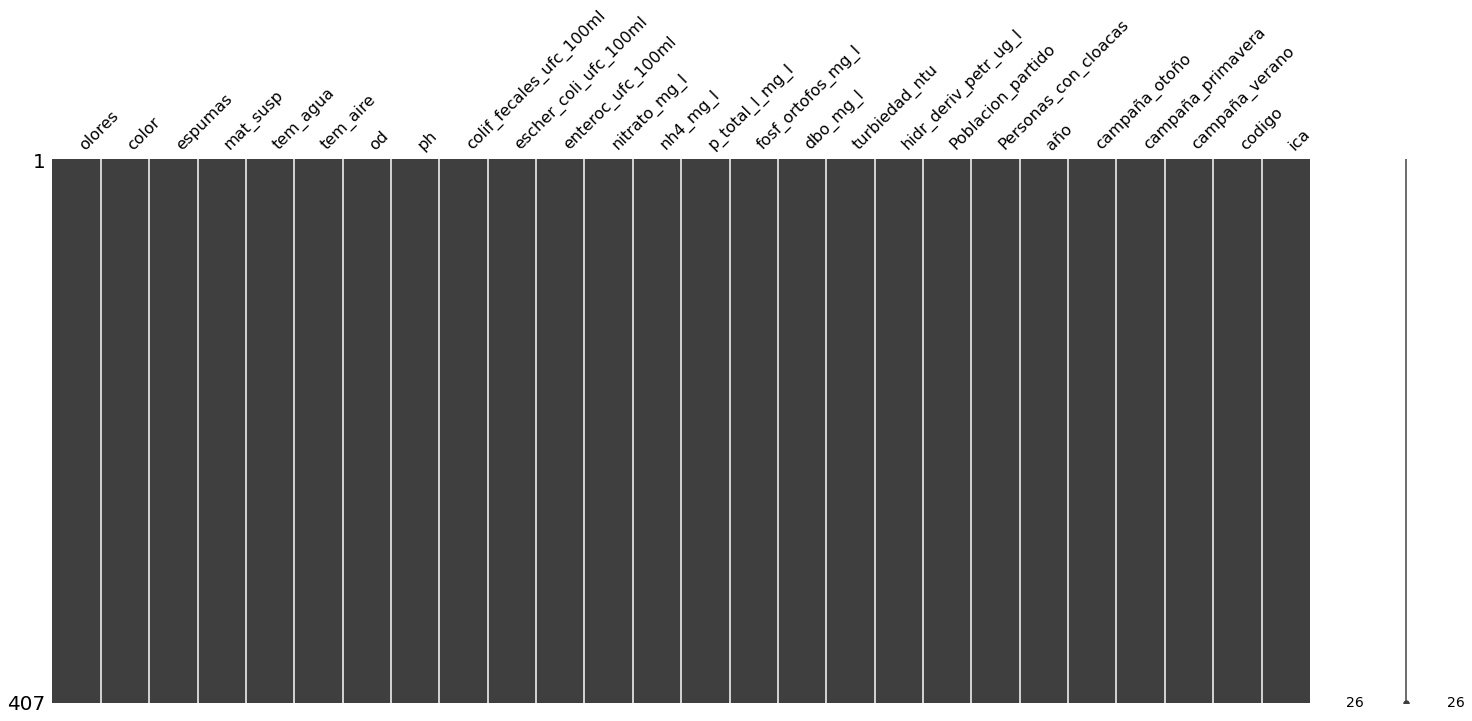

Dataset train A escalado:


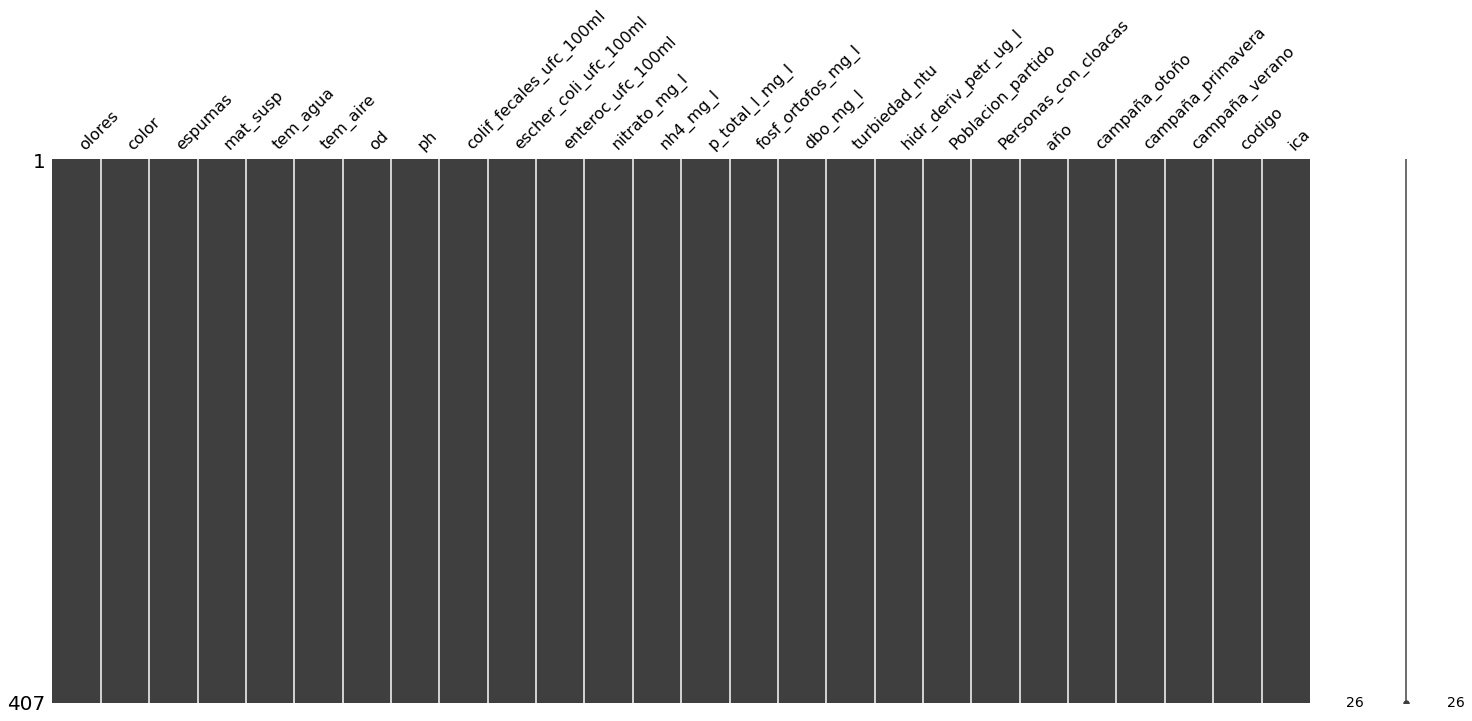

Dataset train A estandarizado:


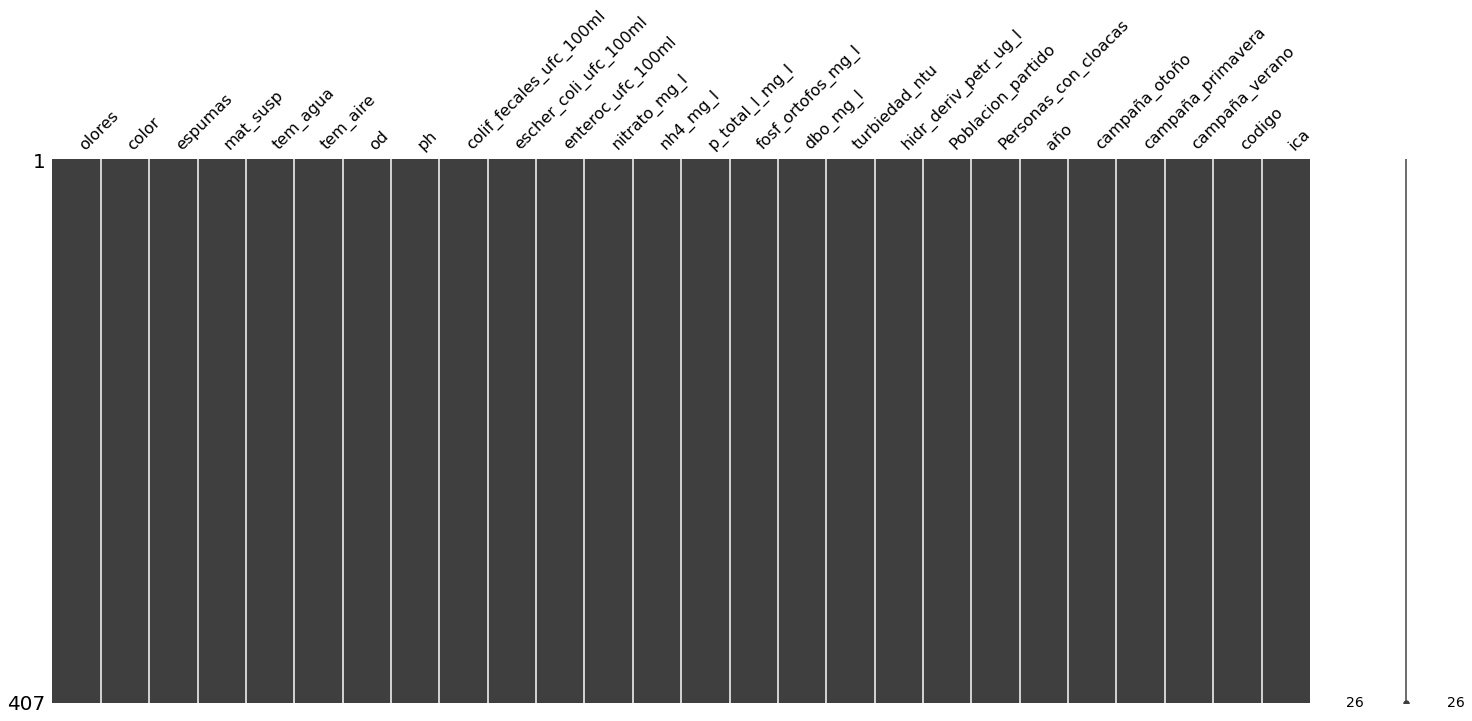

Dataset test A sin escalar ni estandarizar:


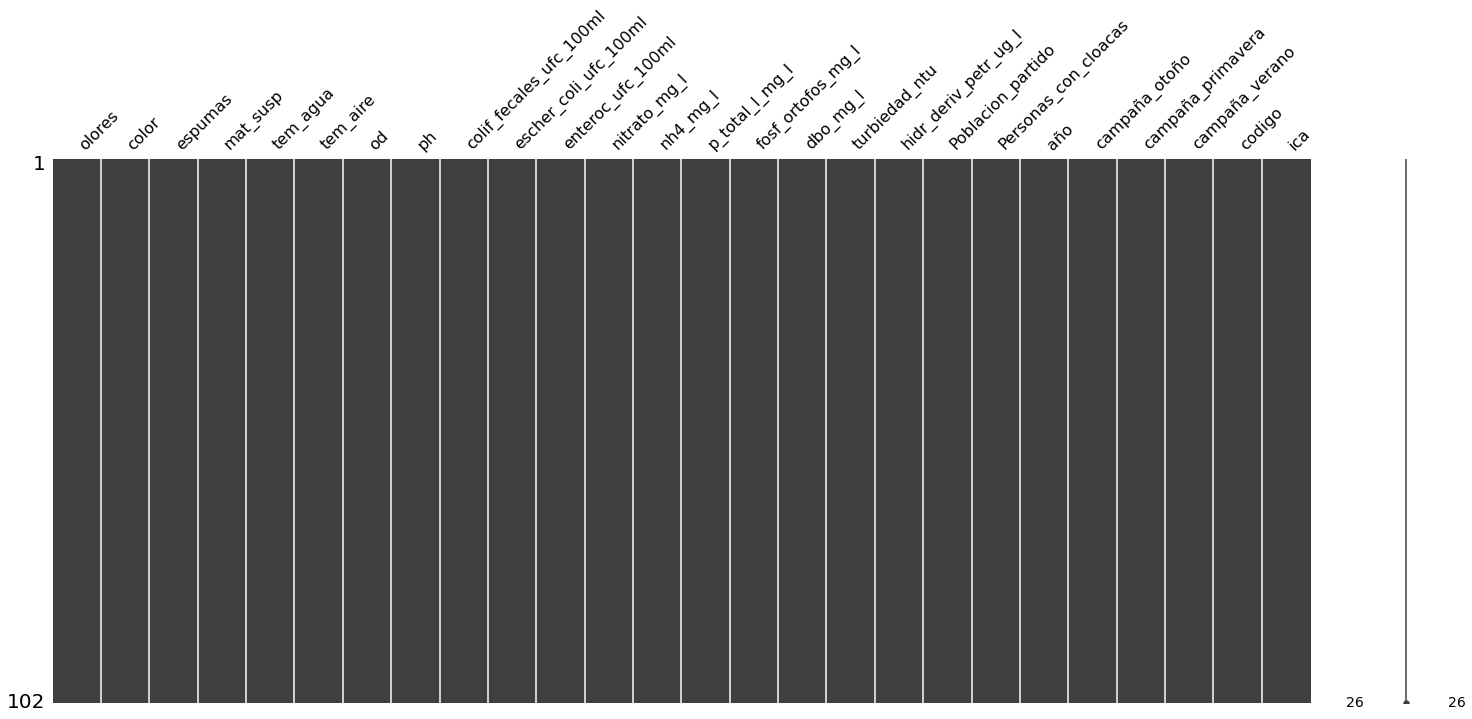

Dataset test A escalado:


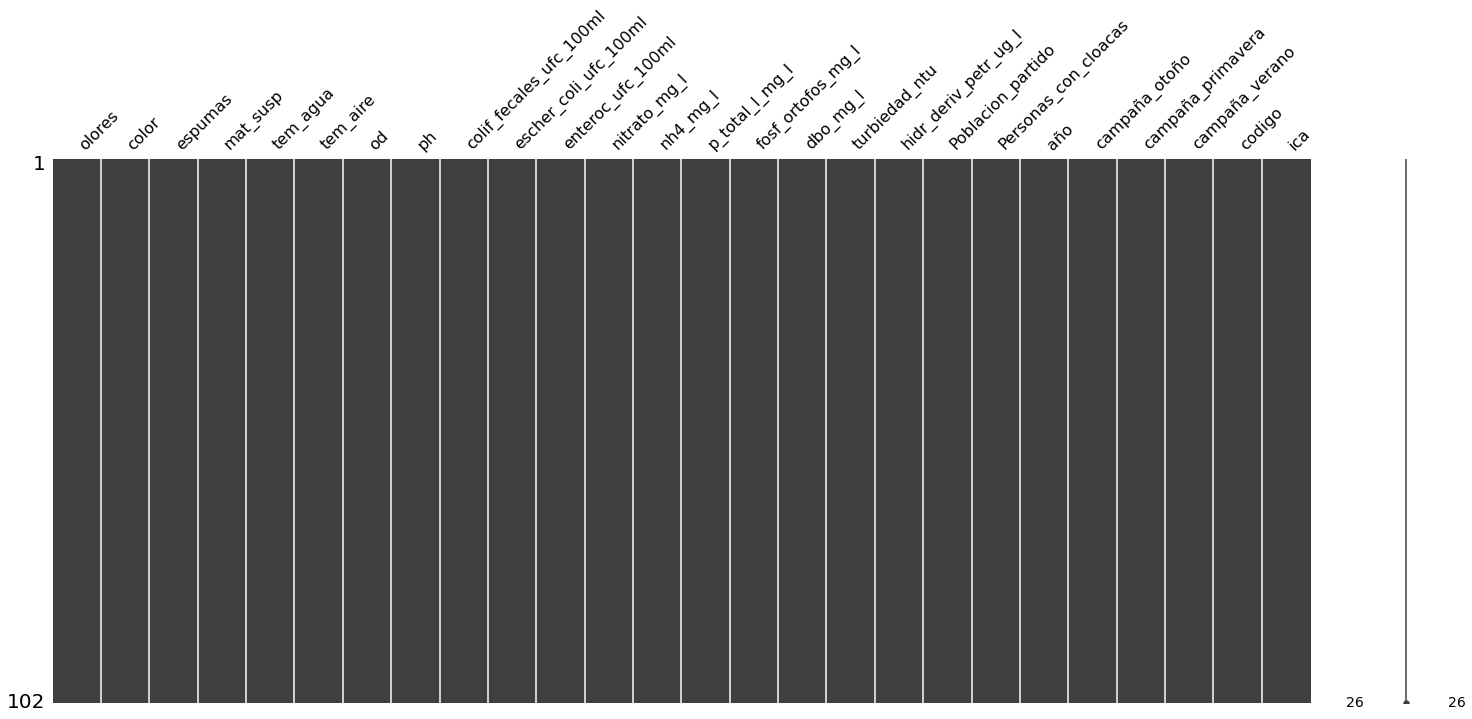

Dataset test A estandarizado:


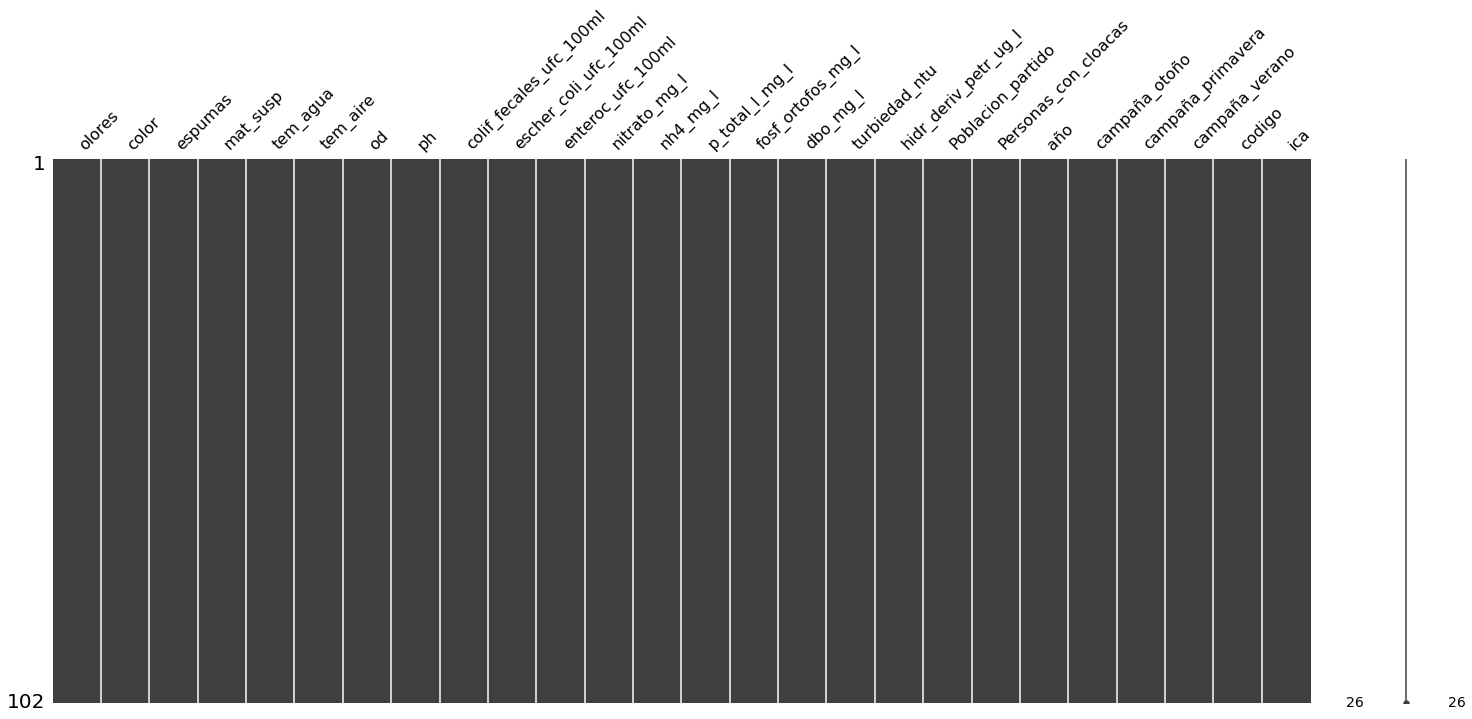

Dataset train B sin escalar ni estandarizar:


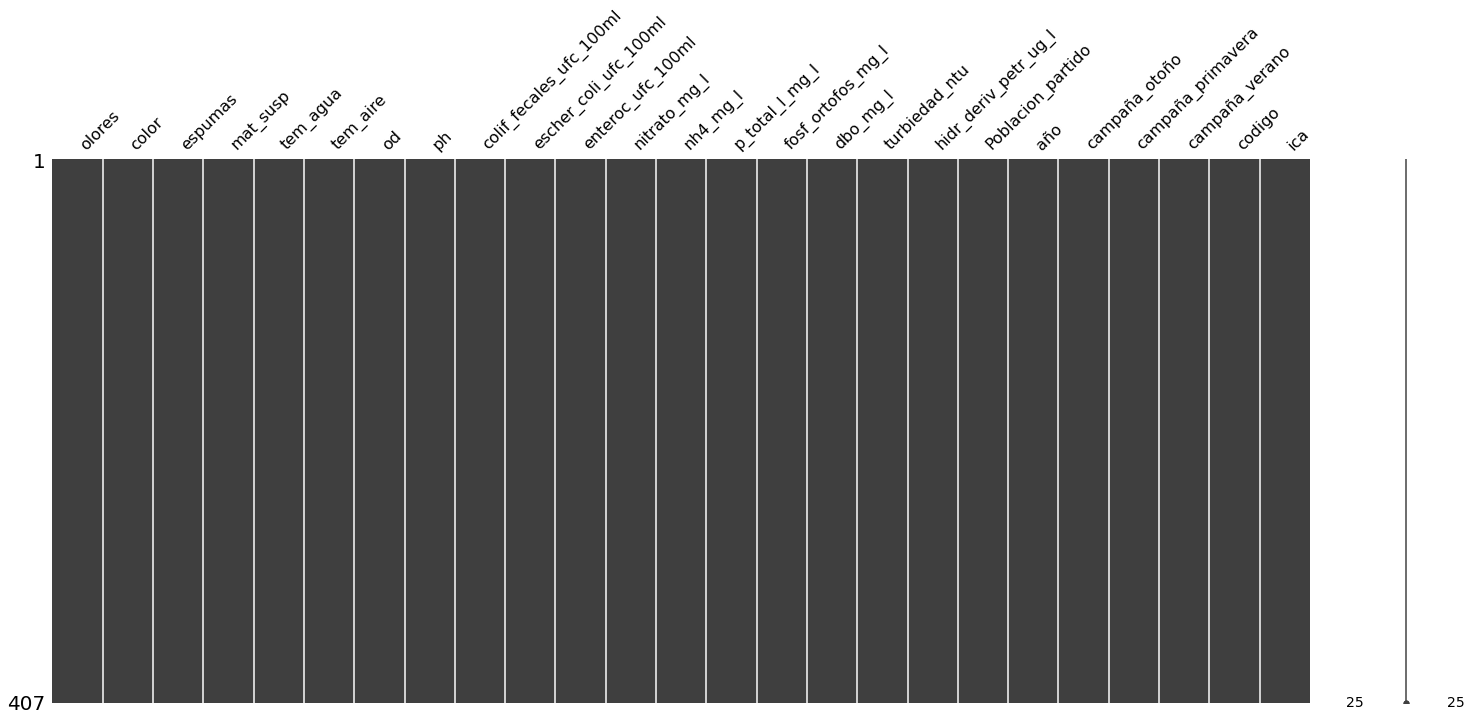

Dataset train B escalado:


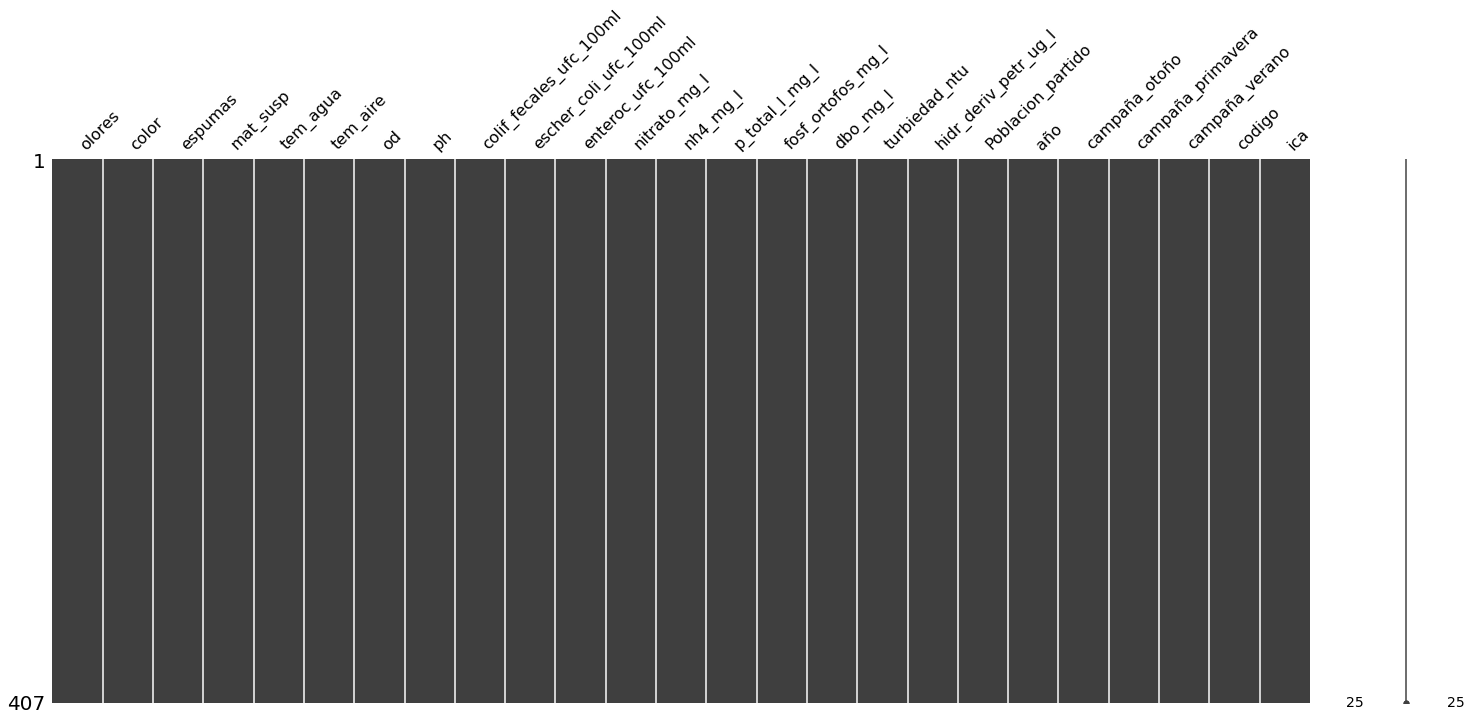

Dataset train B estandarizado:


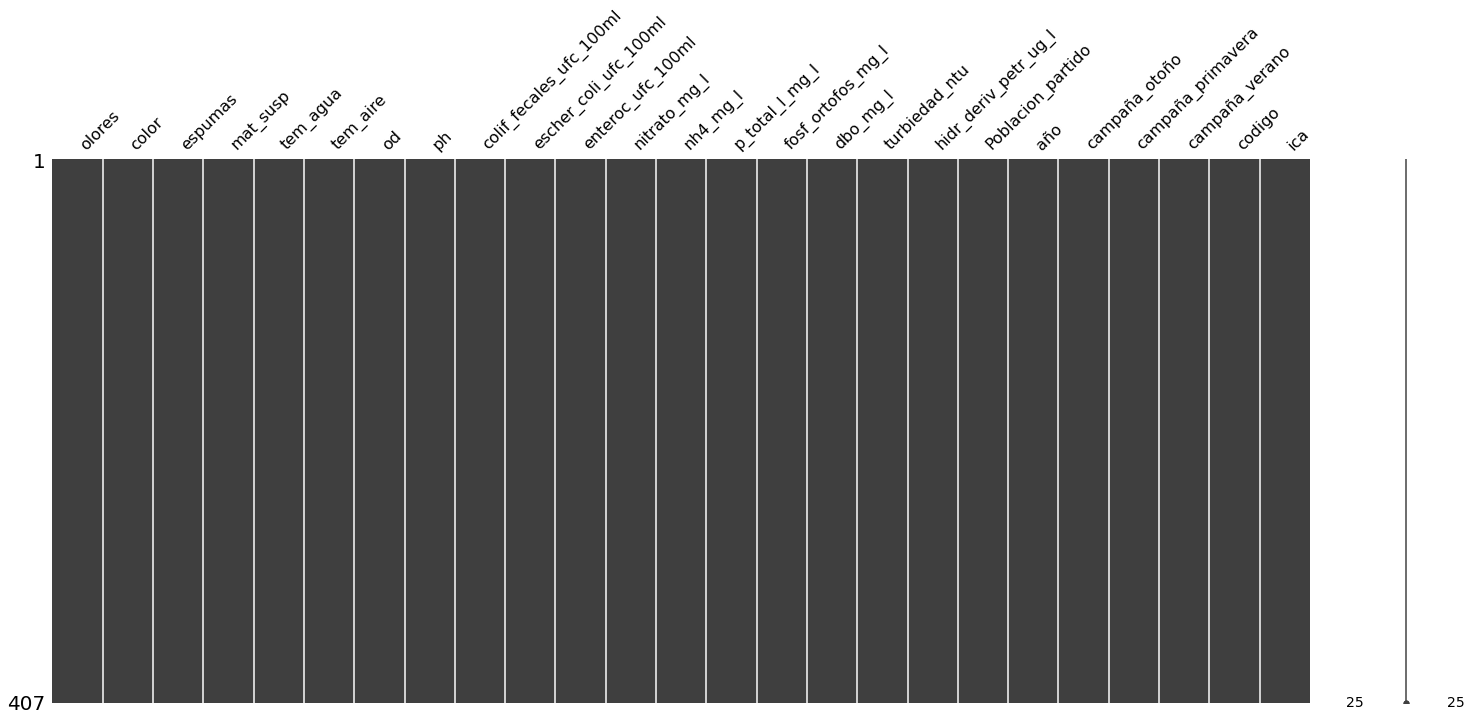

Dataset test B sin escalar ni estandarizar:


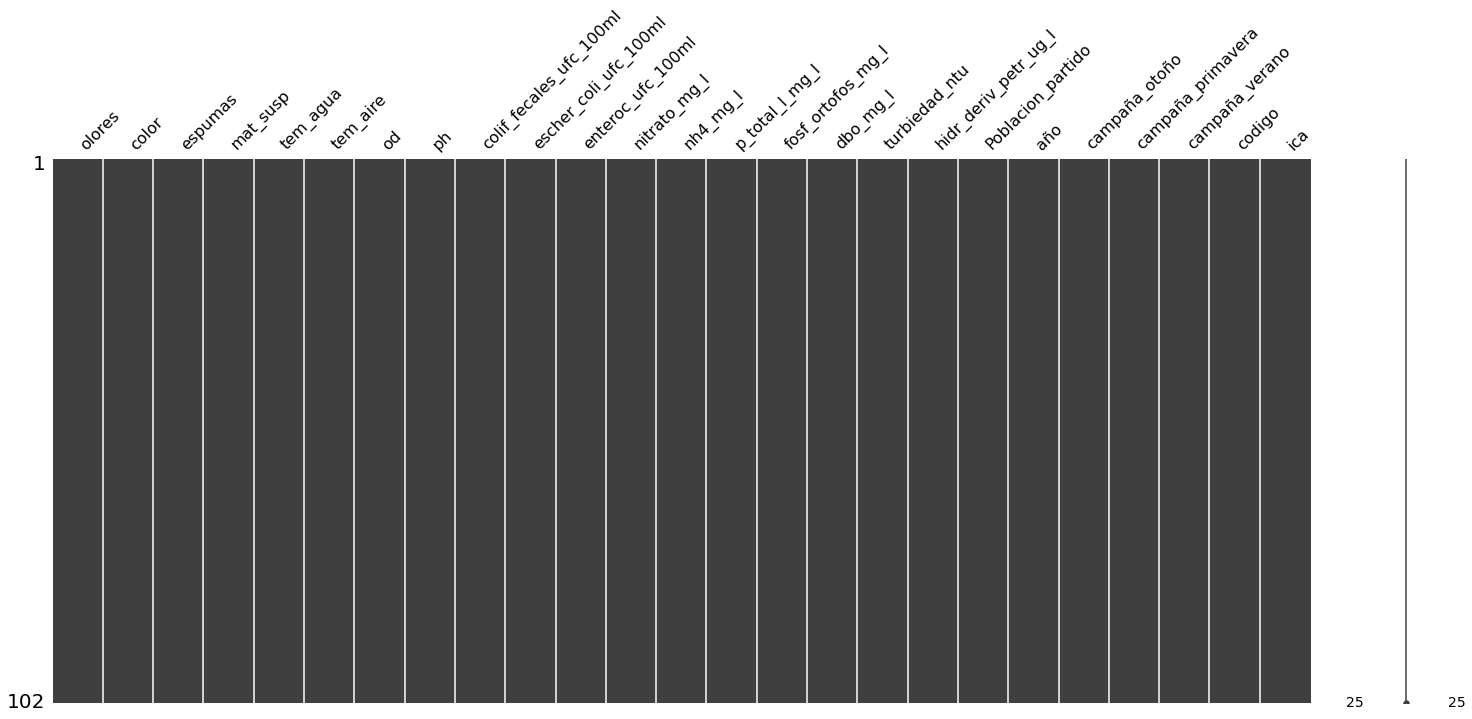

Dataset test B escalado:


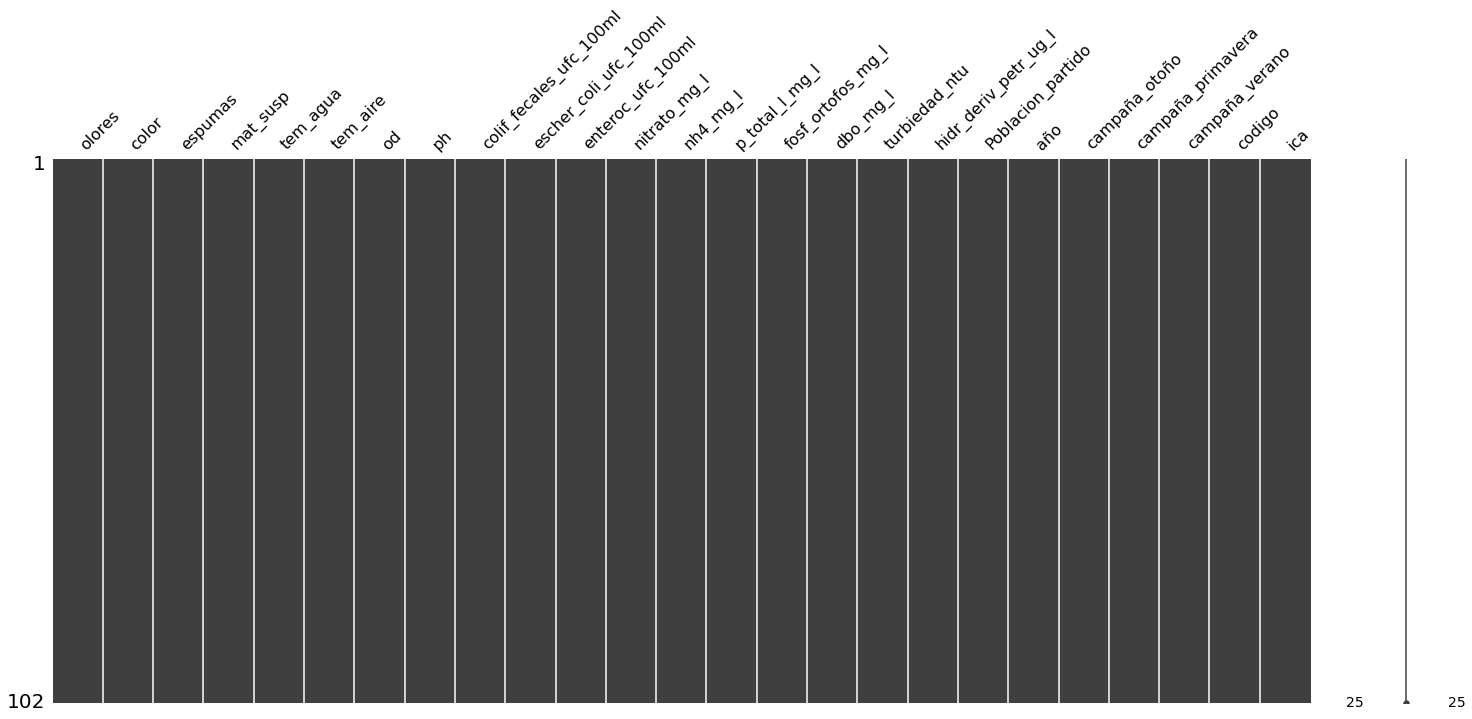

Dataset test B estandarizado:


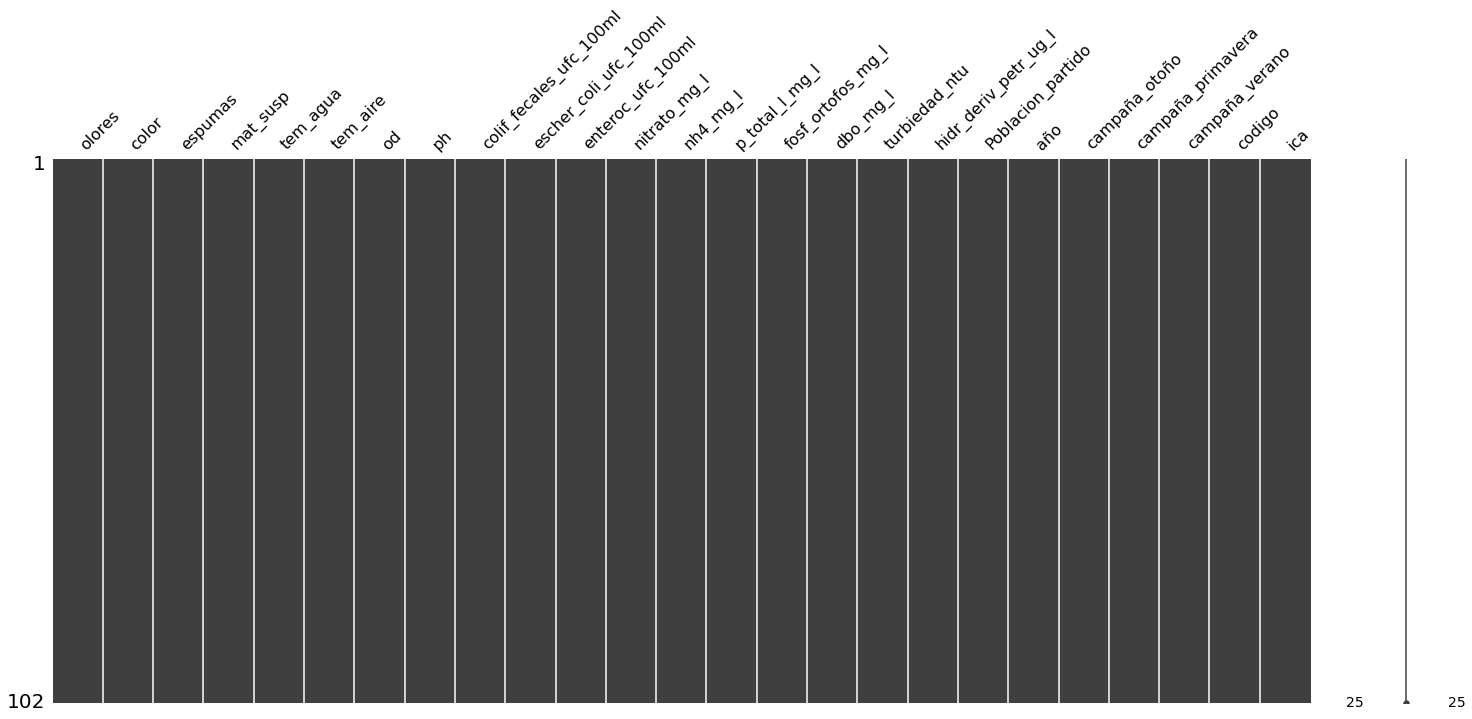

In [11]:
## Matriz de datos faltantes
for name, dataset in datasets.items():
    print(f"Dataset {name}:")
    matrix(dataset)
    plt.show()
    print("=======================================================================================")

In [12]:
## Conteo de datos faltantes
data = []
for name, dataset in datasets.items():
    registros_con_nulos = dataset.isna().any(axis=1).sum()
    data.append({'Dataset': name, 'Registros con nulos': registros_con_nulos})

df_resultados = pd.DataFrame(data)

print("Contamos la cantidad de filas con al menos un valor faltante en cada dataframe:")
display(df_resultados)

Contamos la cantidad de filas con al menos un valor faltante en cada dataframe:


,Dataset,Registros con nulos
0,train A sin escalar ni estandarizar,0
1,train A escalado,0
2,train A estandarizado,0
3,test A sin escalar ni estandarizar,0
4,test A escalado,0
5,test A estandarizado,0
6,train B sin escalar ni estandarizar,0
7,train B escalado,0
8,train B estandarizado,0
9,test B sin escalar ni estandarizar,0


### 1.D. Valores outliers

Realizamos boxplots para cada variable y dataset. Verificamos que no haya valores outliers indeseados.

In [28]:
def boxplots(datasets, cols, n_rows, n_cols):
    """
    Muestra gráficos boxplots de las variables dadas en argumento cols para varios dataframes
    dados en argumento datasets.
    
    No devuelve ningún valor.
    
    Argumentos:
    -----------------------------------------------
        datasets : dict
            Diccionario con los dataframes a explorar. Las llaves serán los nombres con los que se identifica a
            cada dataframe, y los valores (de tipo pandas.Dataframe) serán los dataframes. Cada dataframe debe
            tener entre sus columnas todas las que aparezcan en cols. La cantidad de dataframes totales debe ser
            igual a n_rowx x n_cols.
        cols : list | tuple
            Iterable con los nombres de las columnas a explorar (strings). Todas las columnas dadas deben estar
            en todos los dataframes.
        n_rows : int
            Cantidad de filas para los subplots.
        n_cols : int
            Cantidad de columnas para los subplors
    """
    for col in cols:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))
        axes = axes.flatten()
        plt.suptitle(f"Boxplots de {col}", fontsize=16)
        for i, ((name, dataset), ax) in enumerate(zip(datasets.items(), axes)):
            sns.boxplot(y=dataset[col], ax=ax)
            ax.set_title(name, fontsize=12)
            if i == 0 or i == 3:
                ax.set_ylabel(col)
            else:
                ax.set_ylabel('')
        plt.tight_layout()
        plt.show()

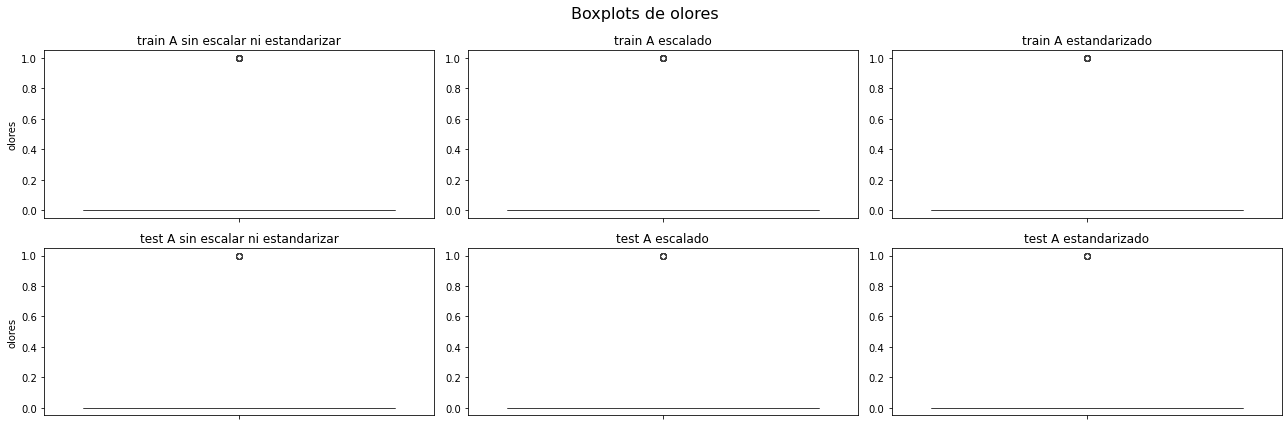

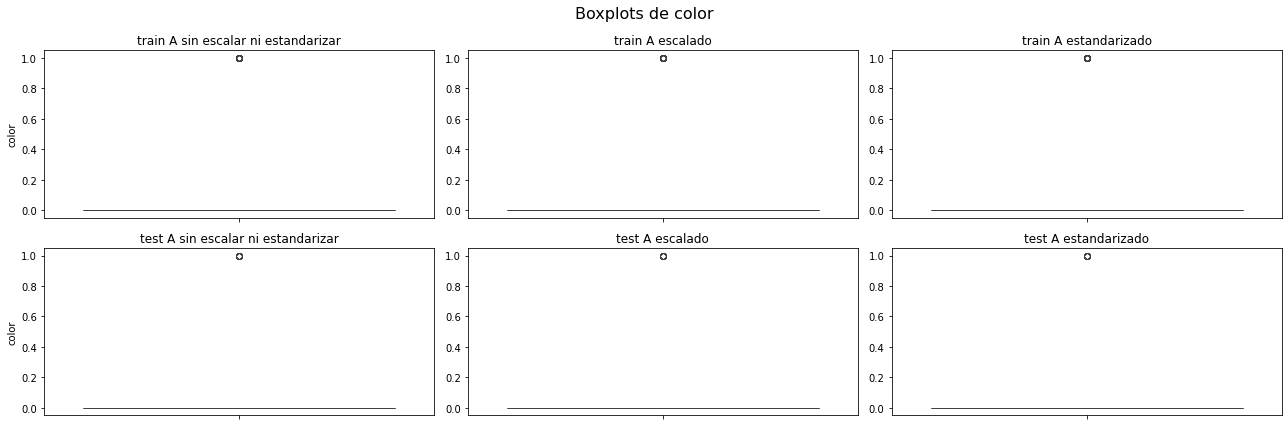

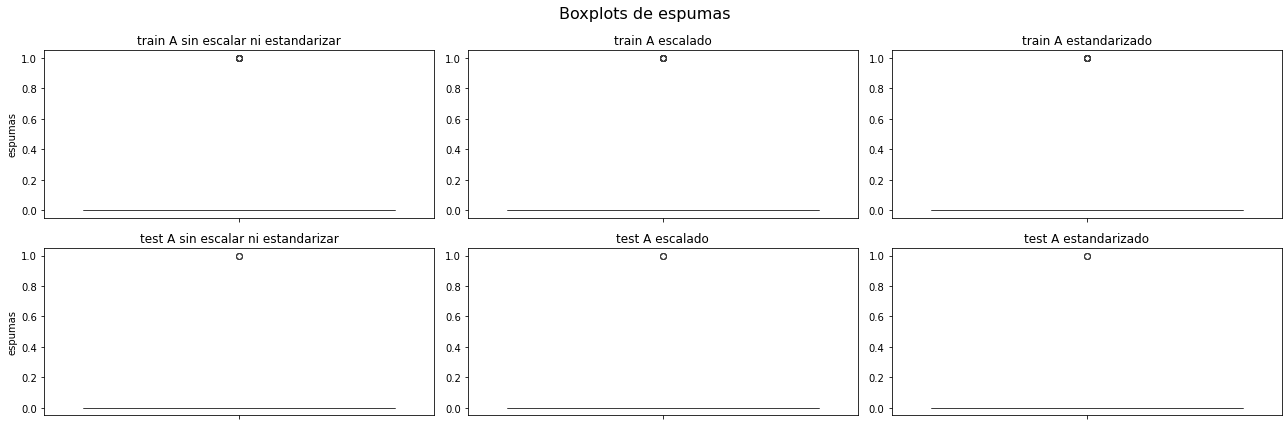

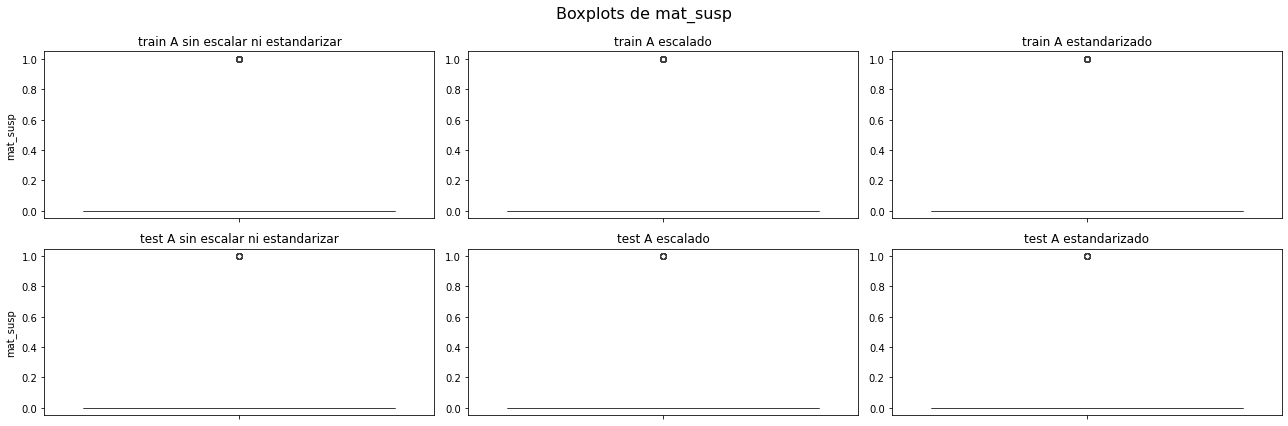

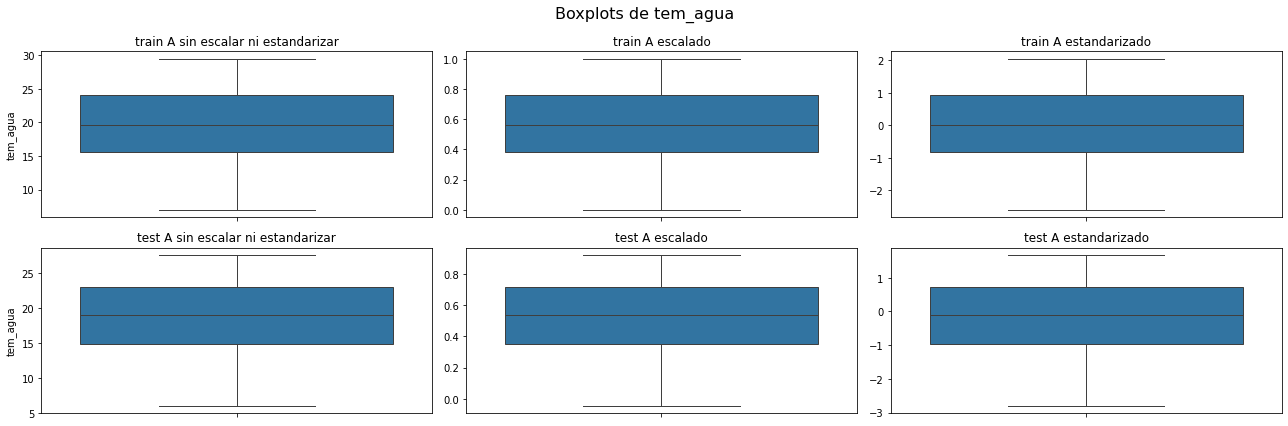

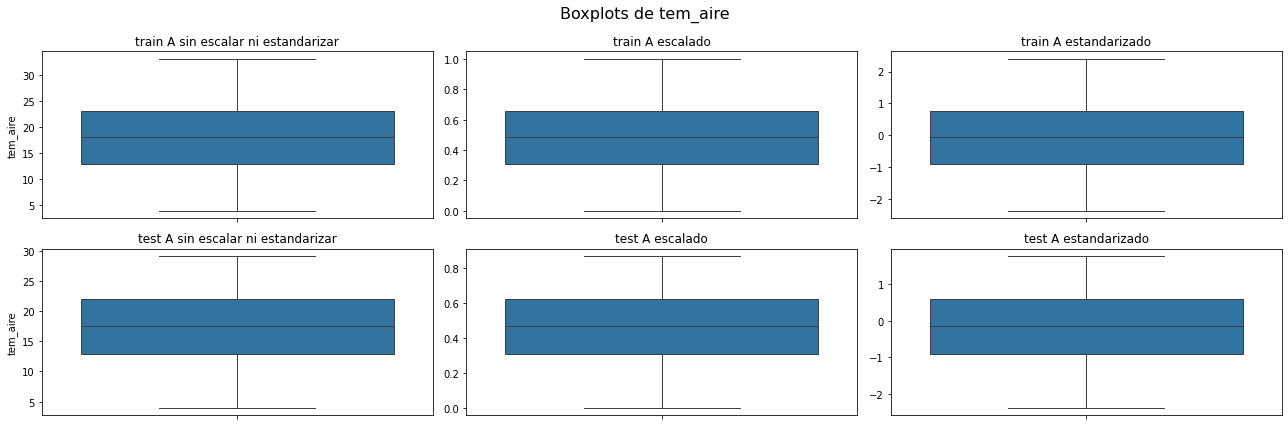

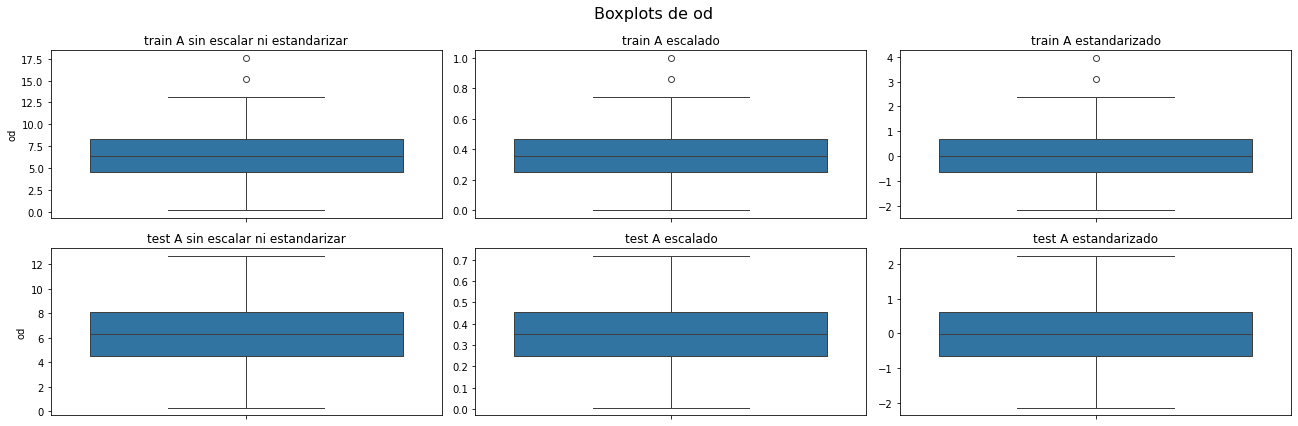

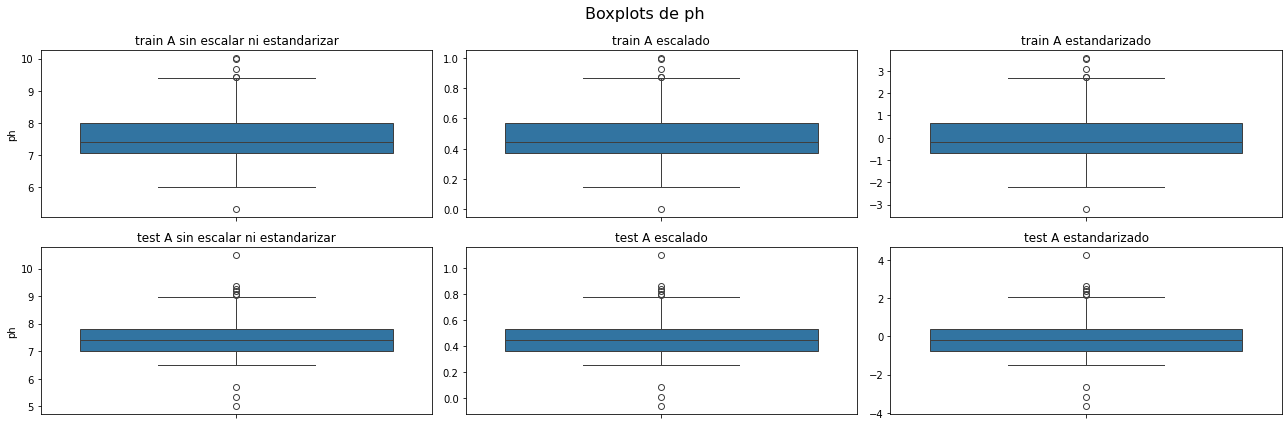

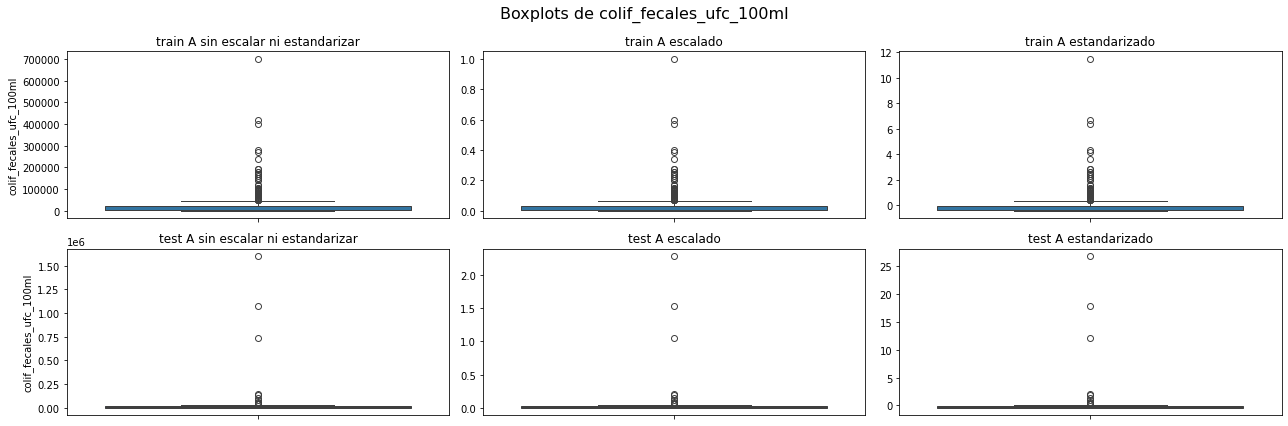

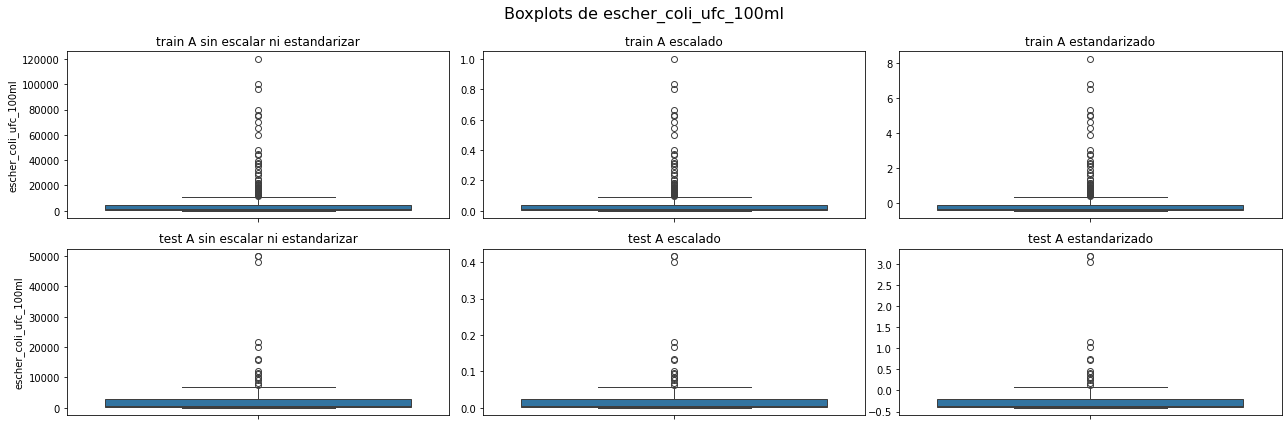

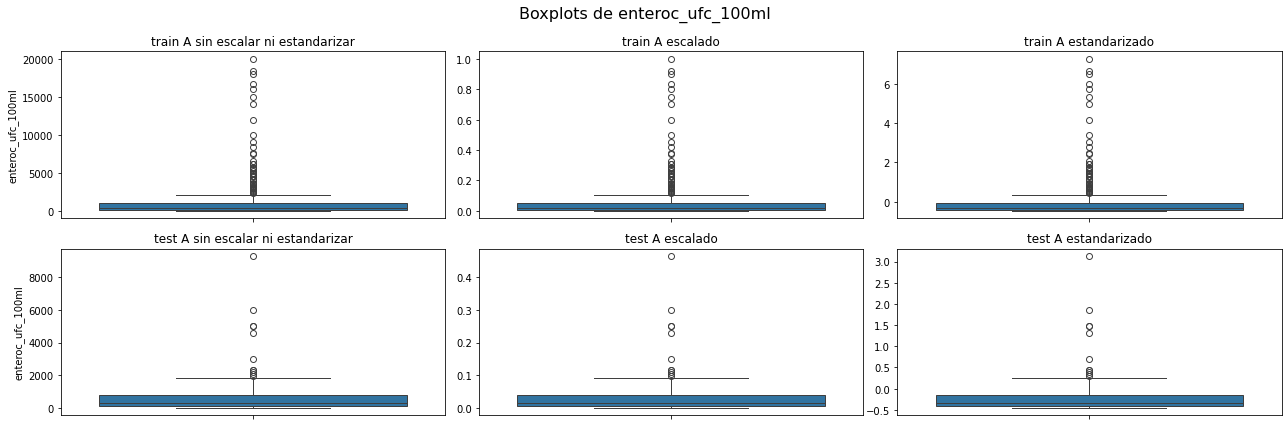

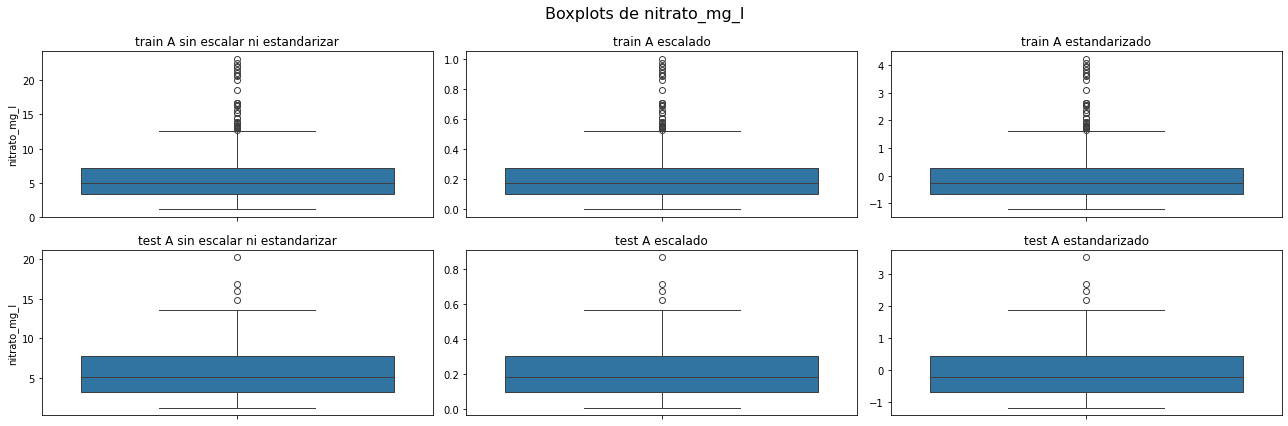

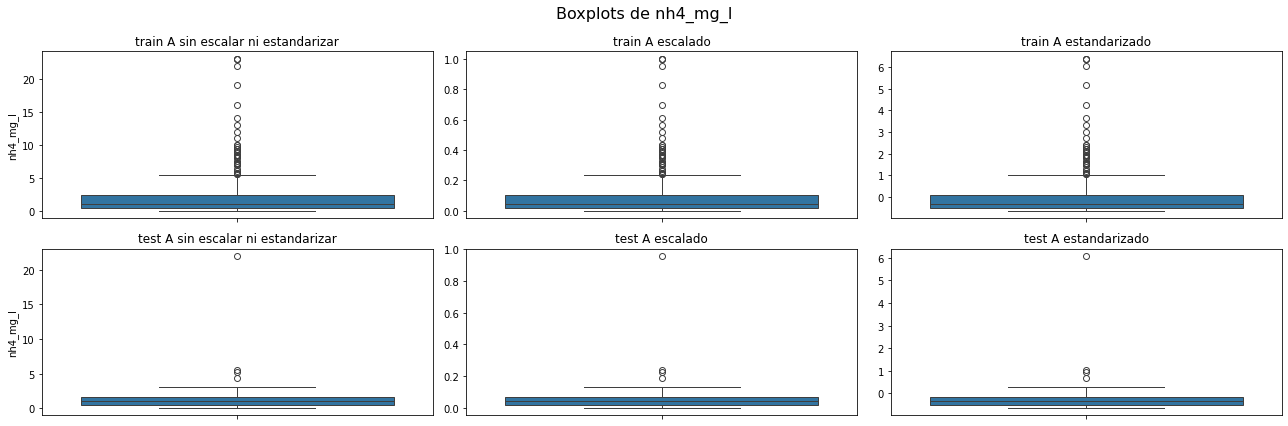

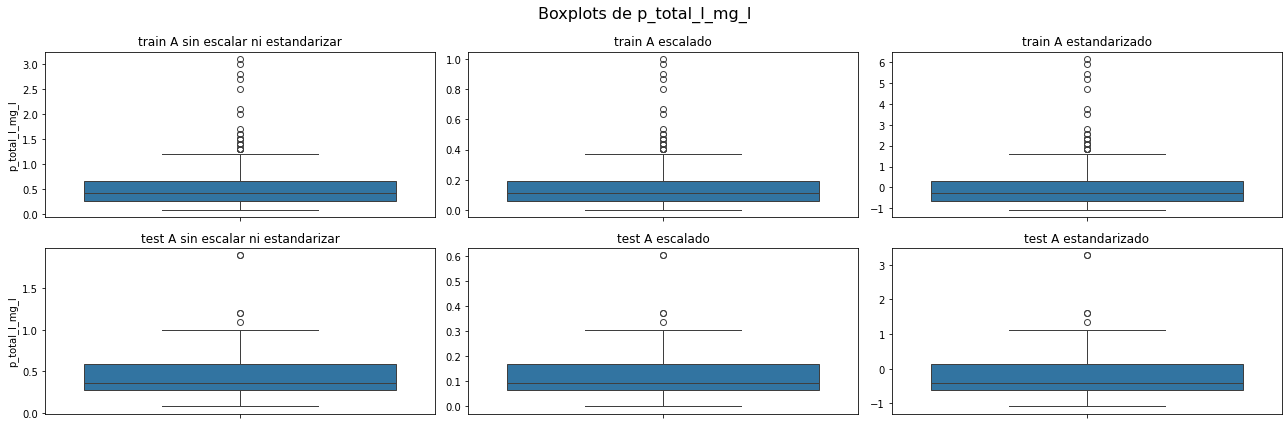

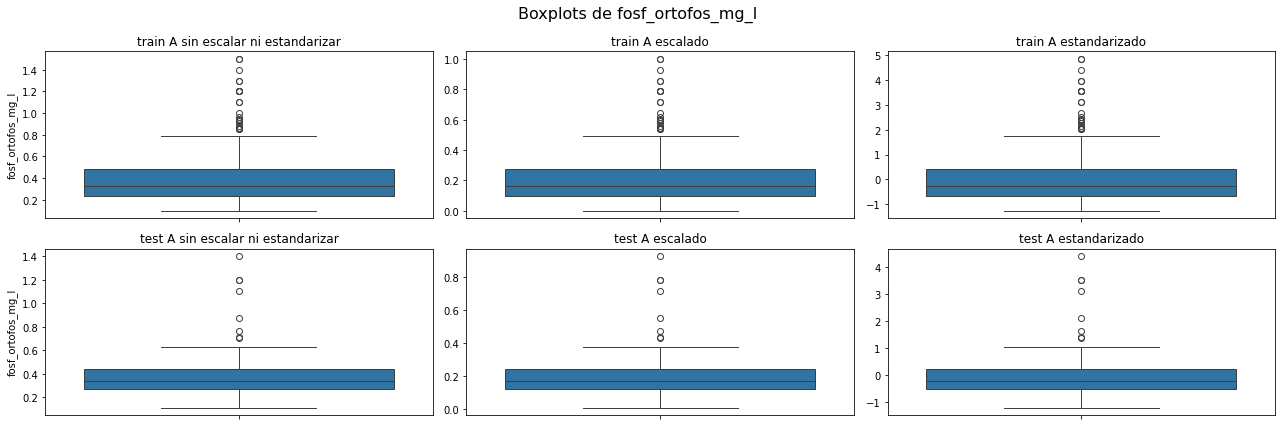

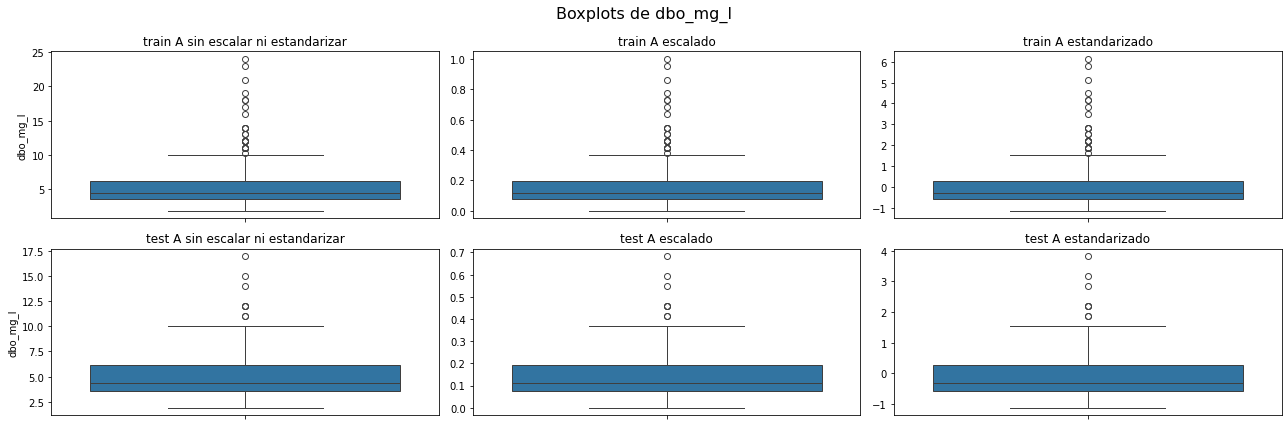

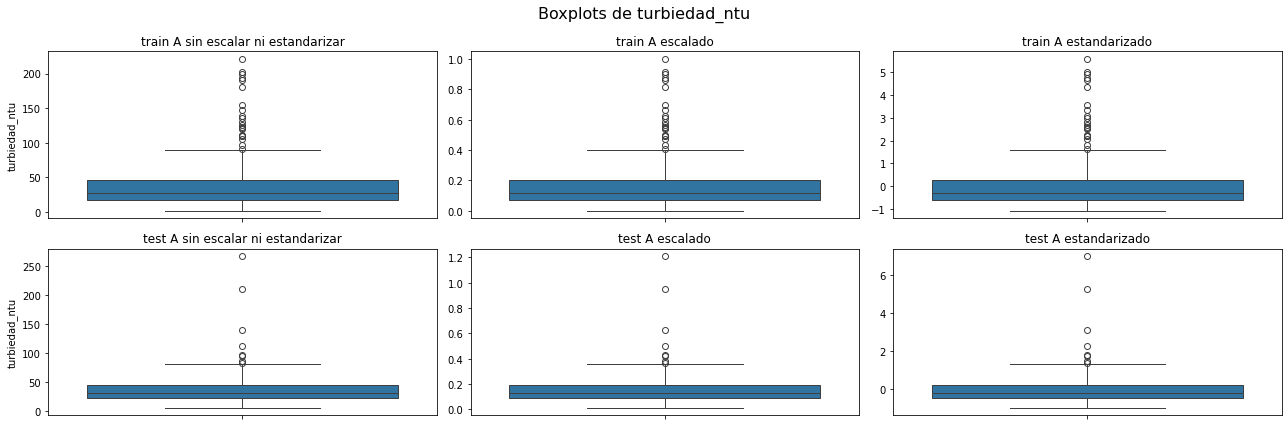

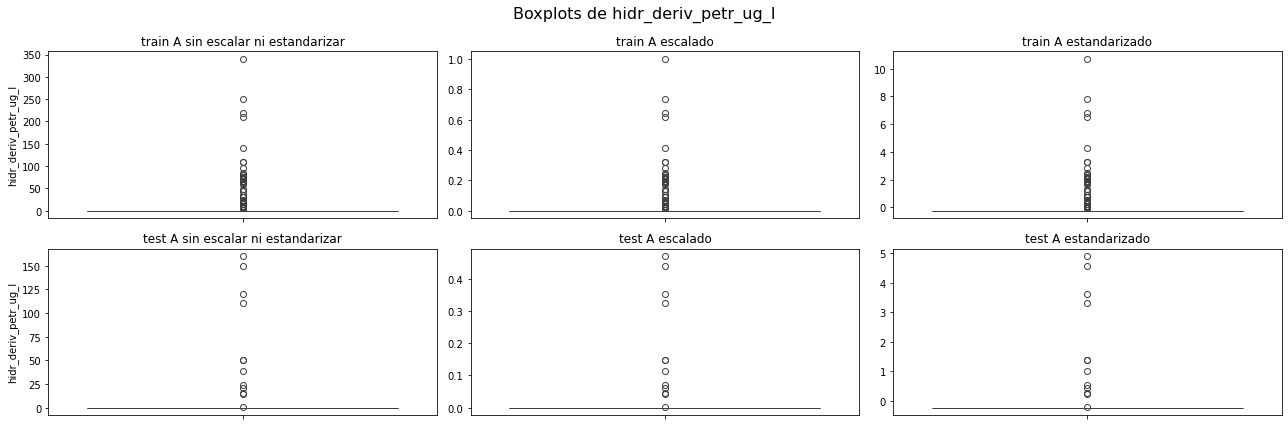

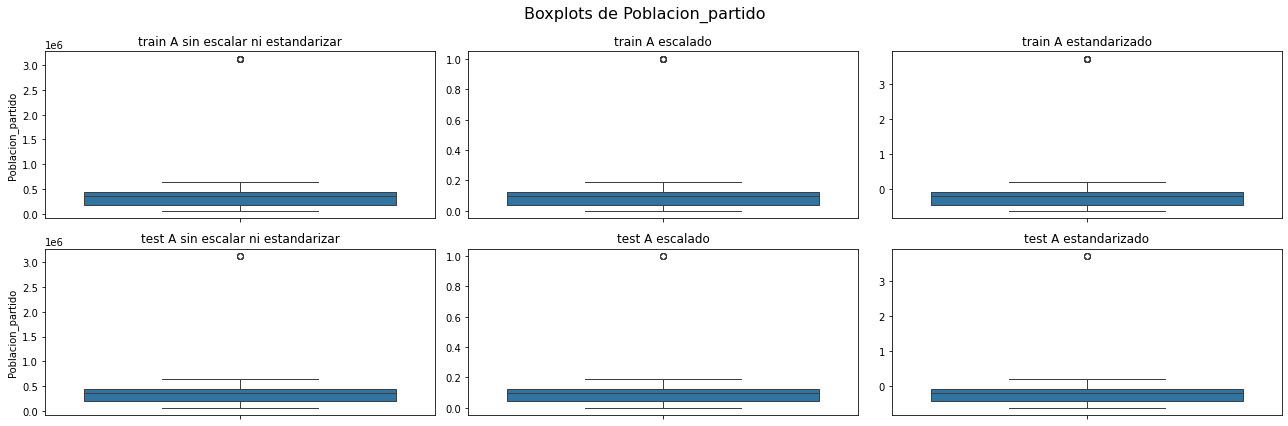

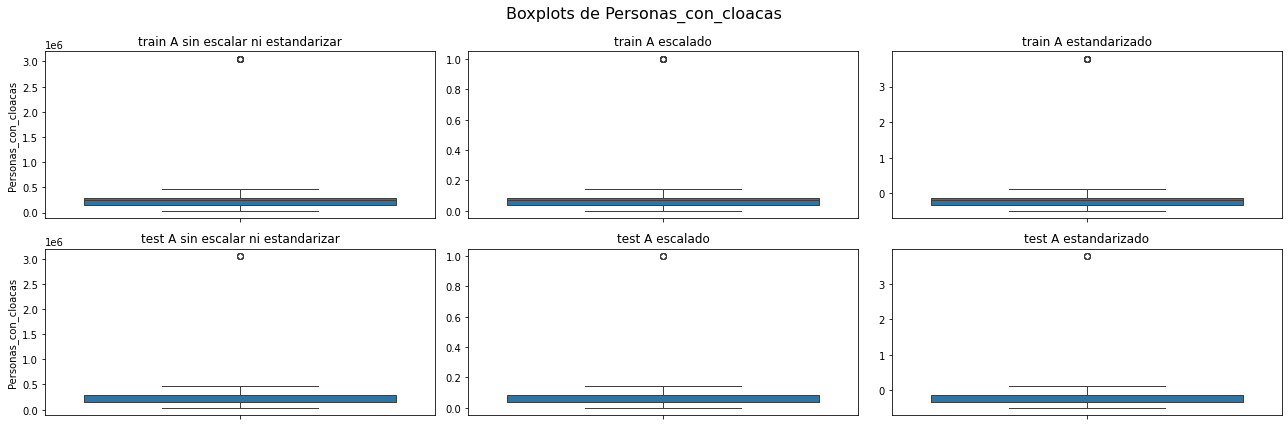

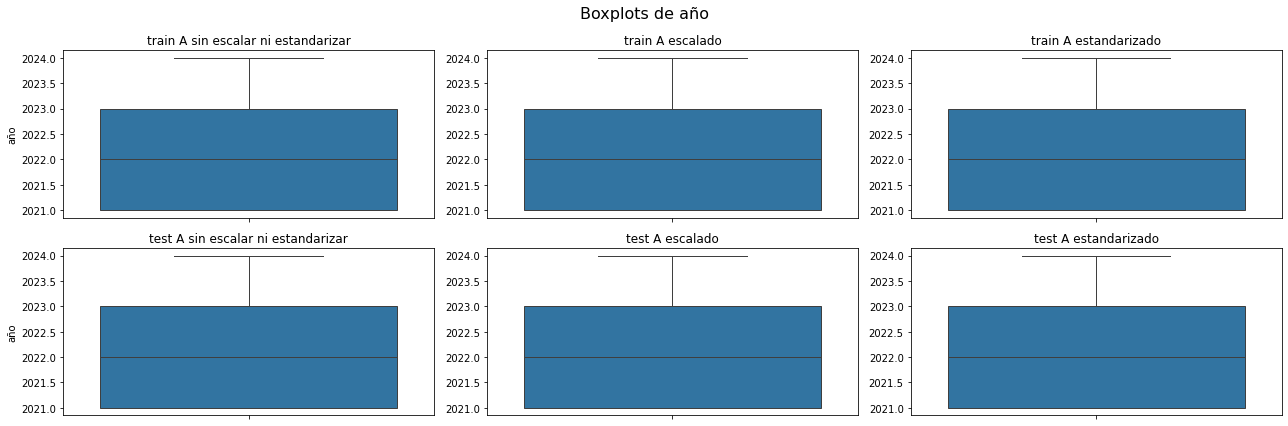

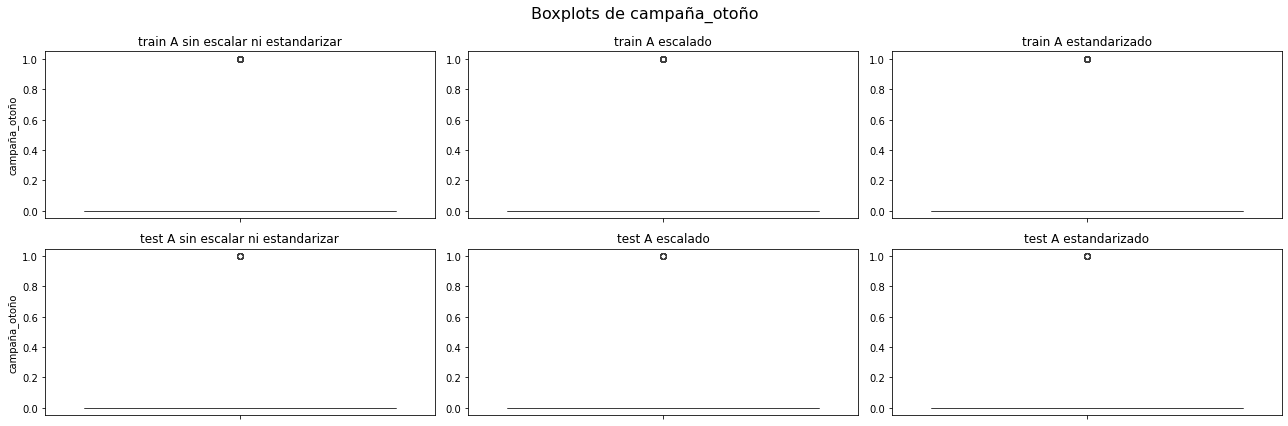

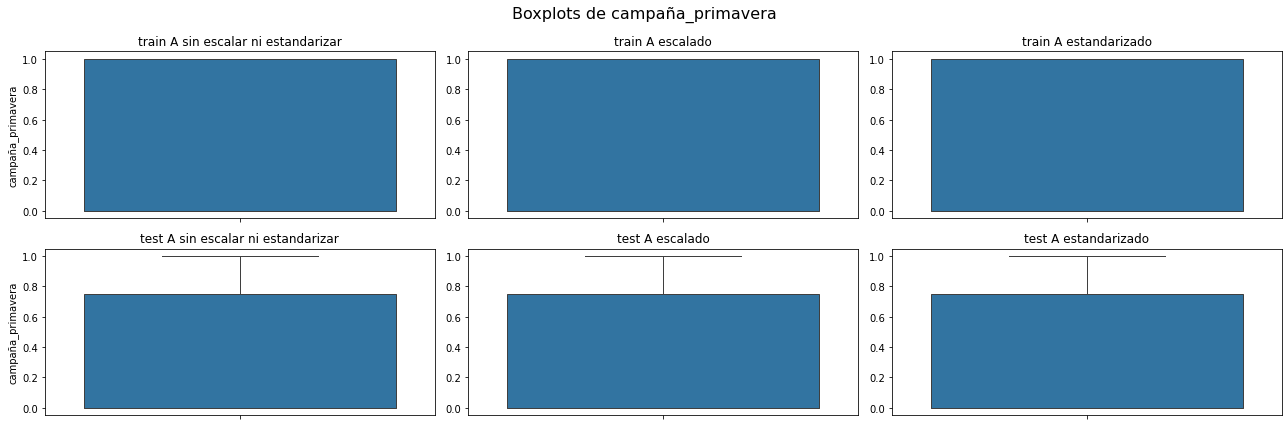

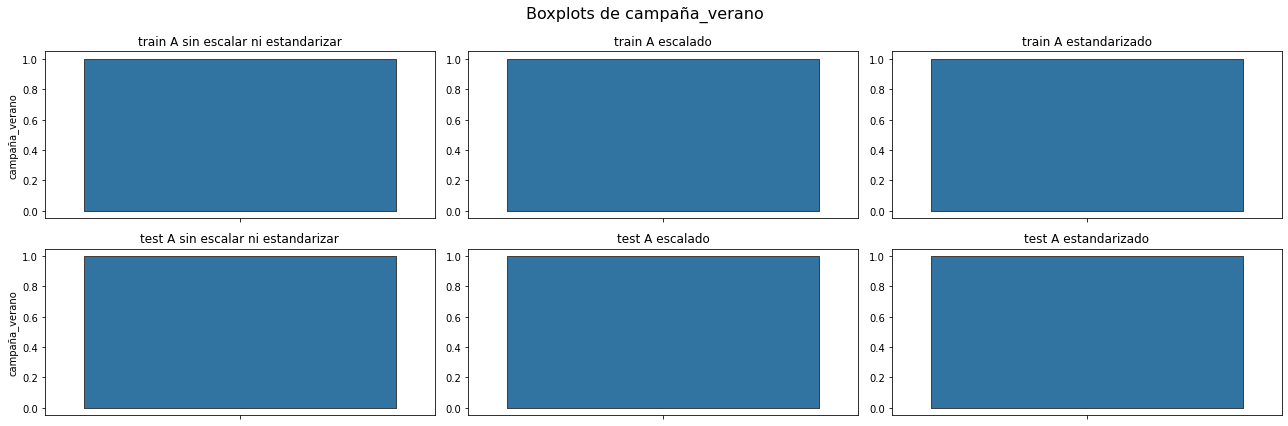

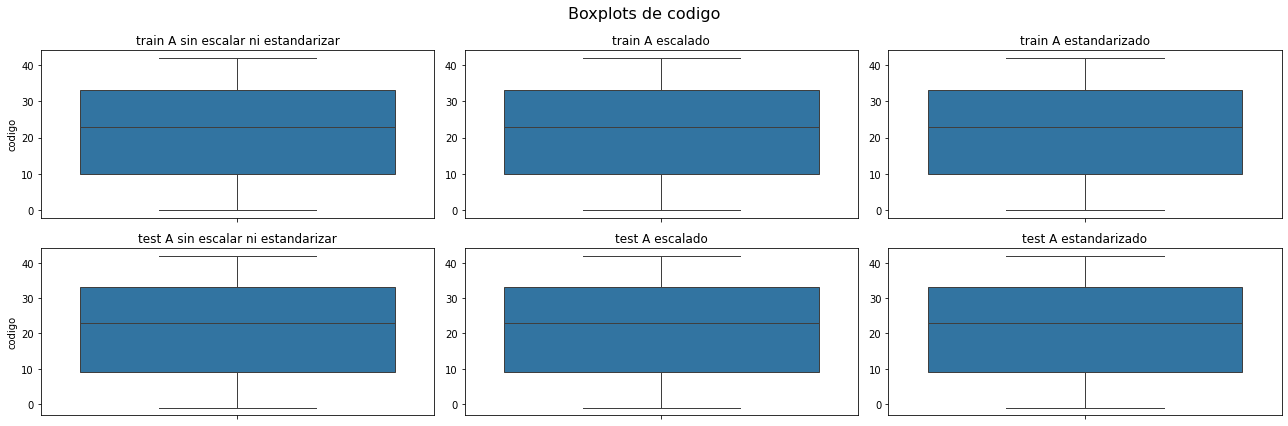

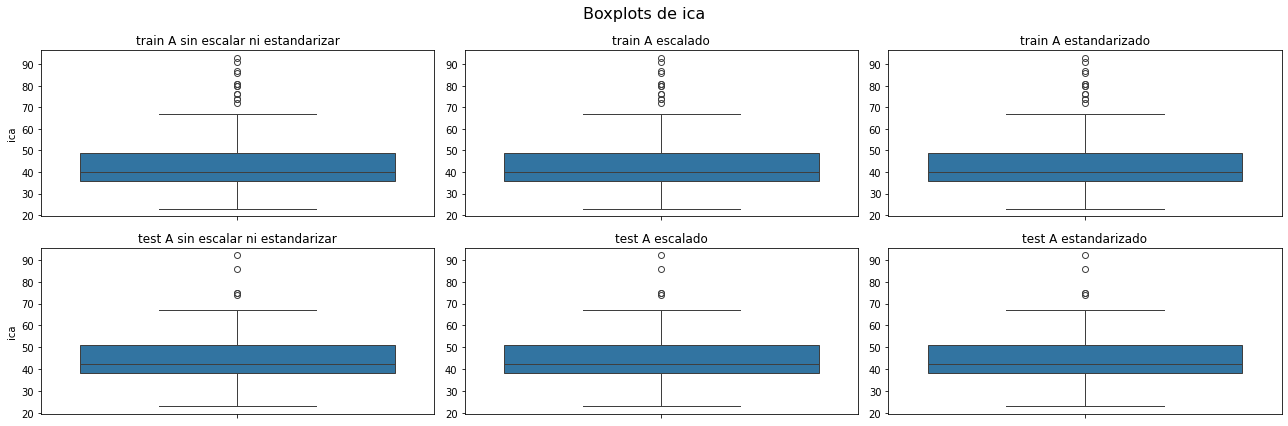

In [29]:
## Veamos boxplots para datasets A
boxplots(datasets_A, cols_A, 2, 3)

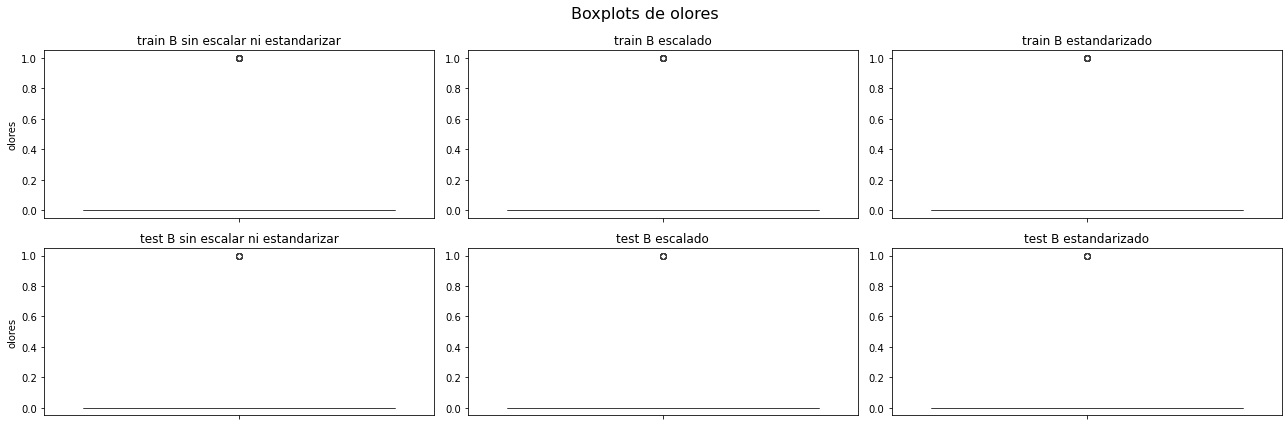

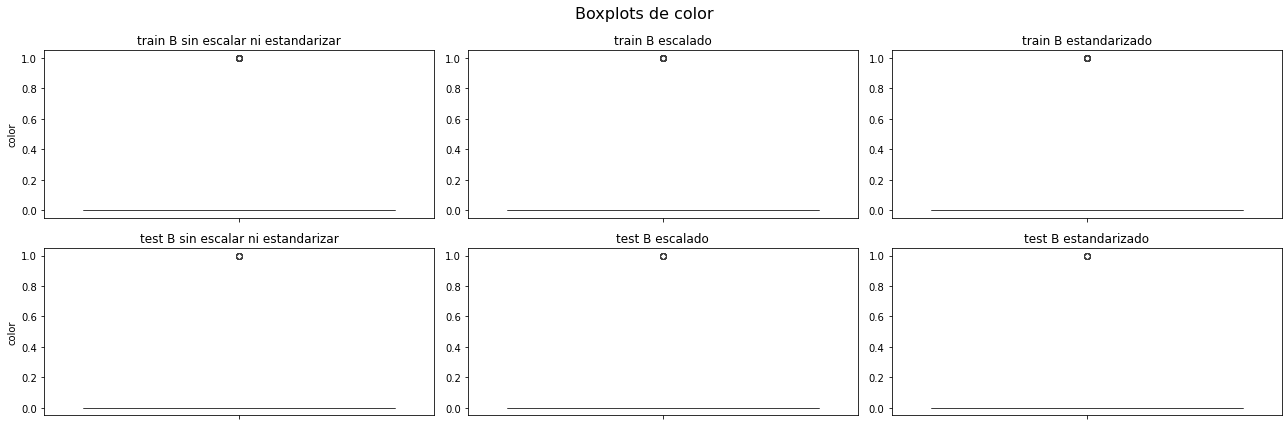

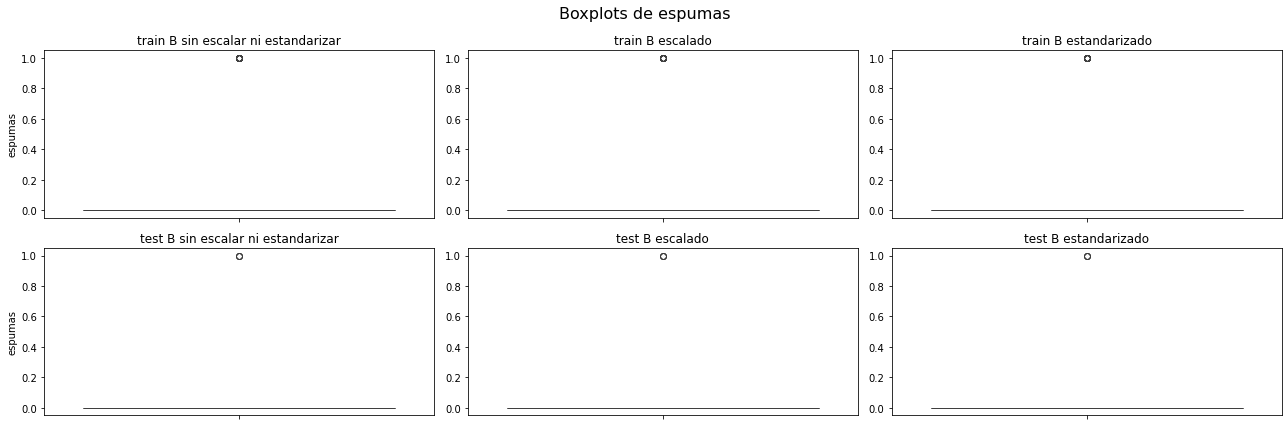

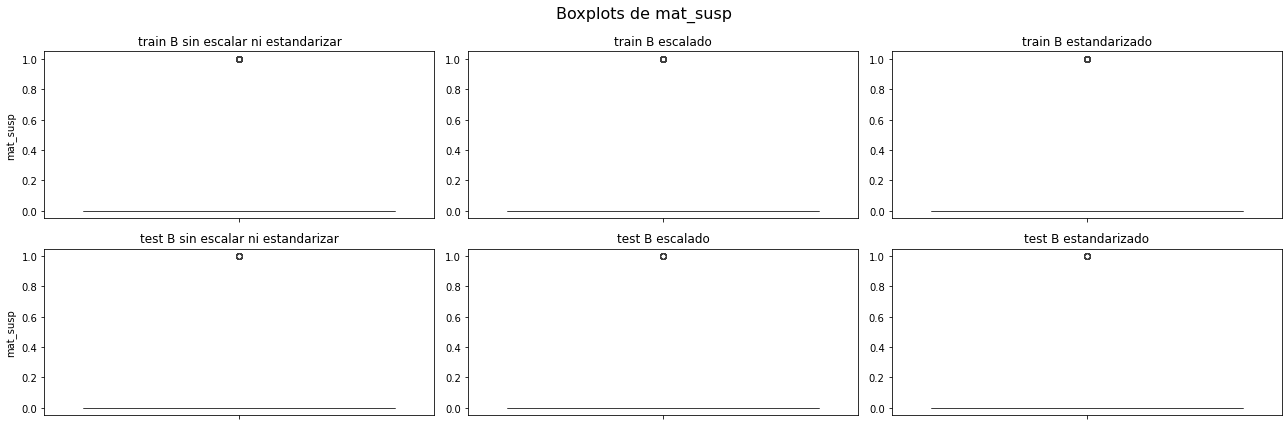

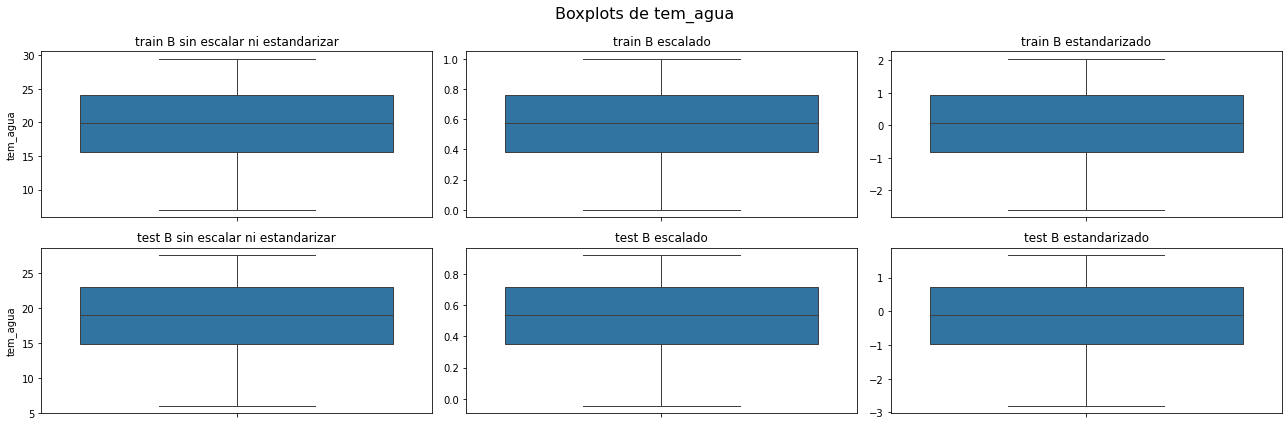

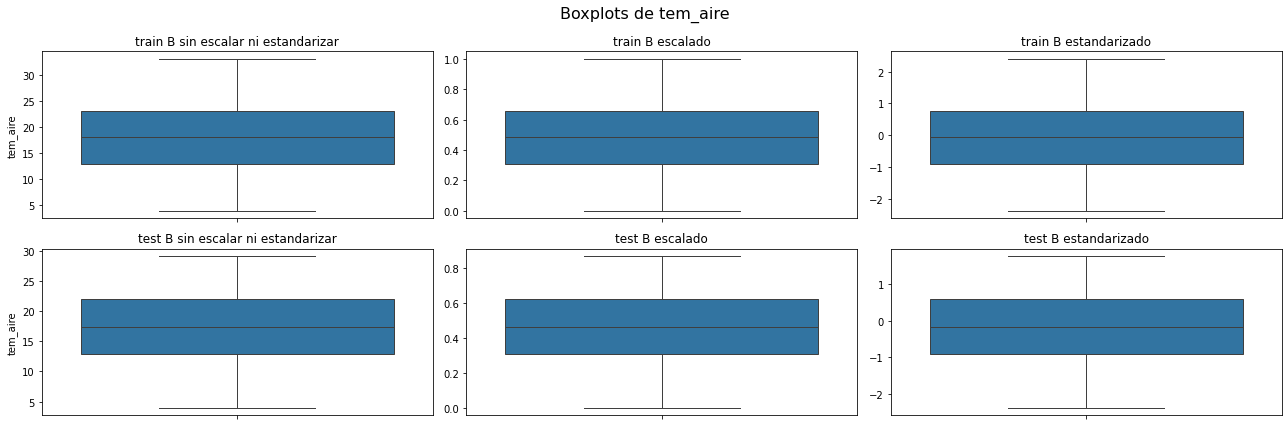

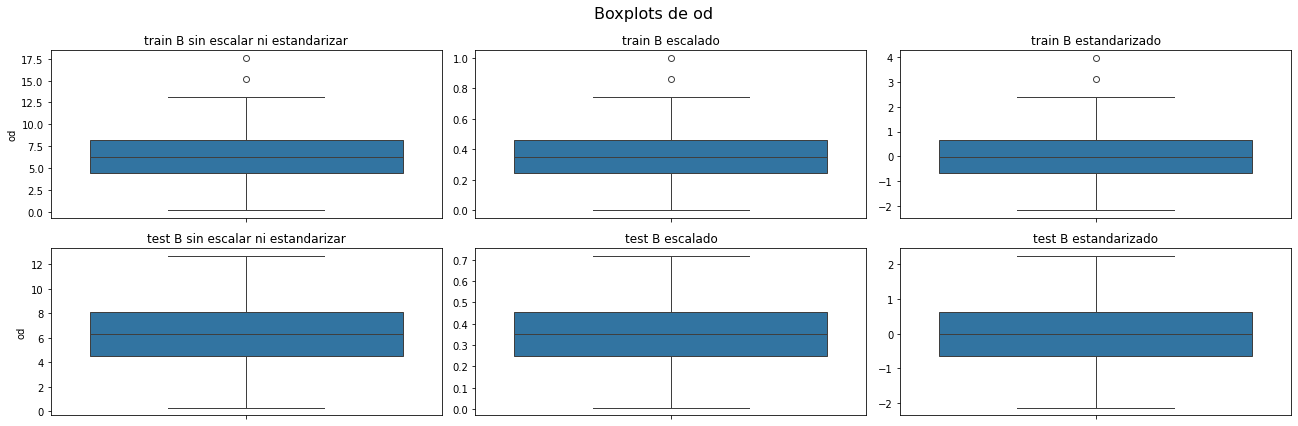

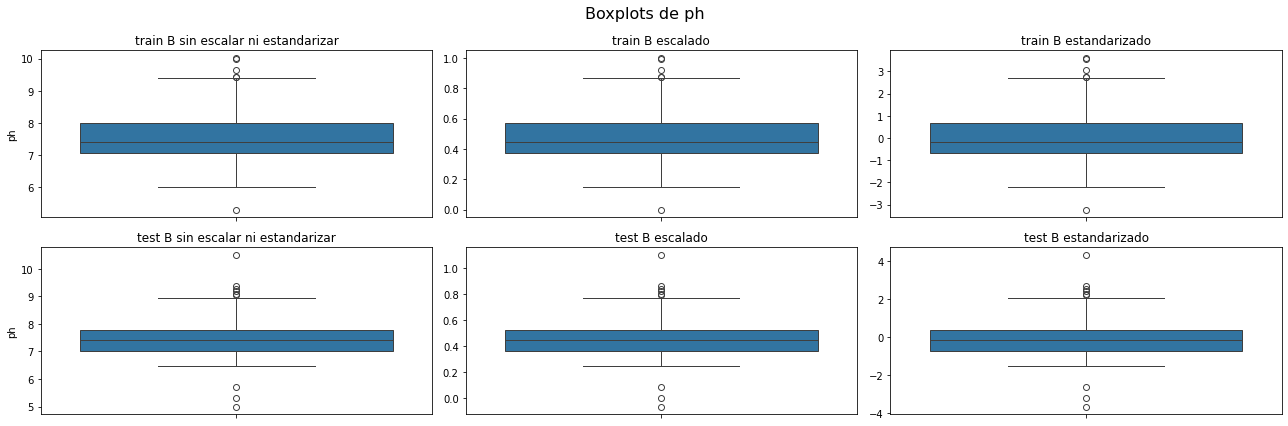

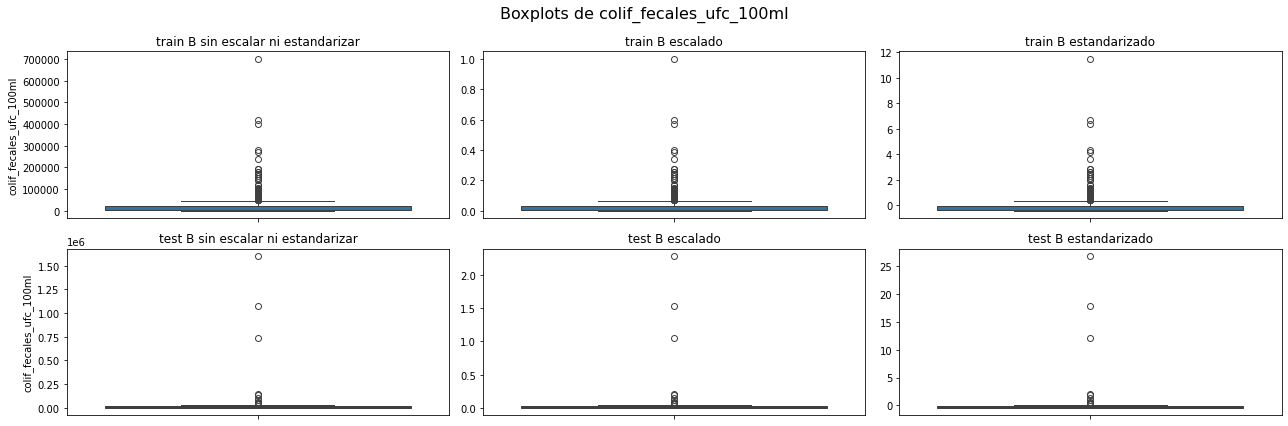

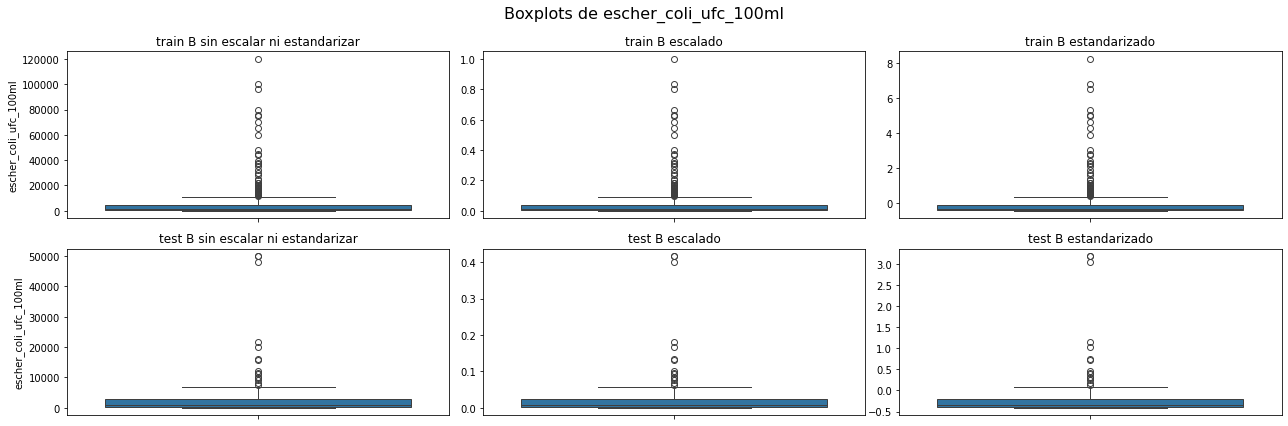

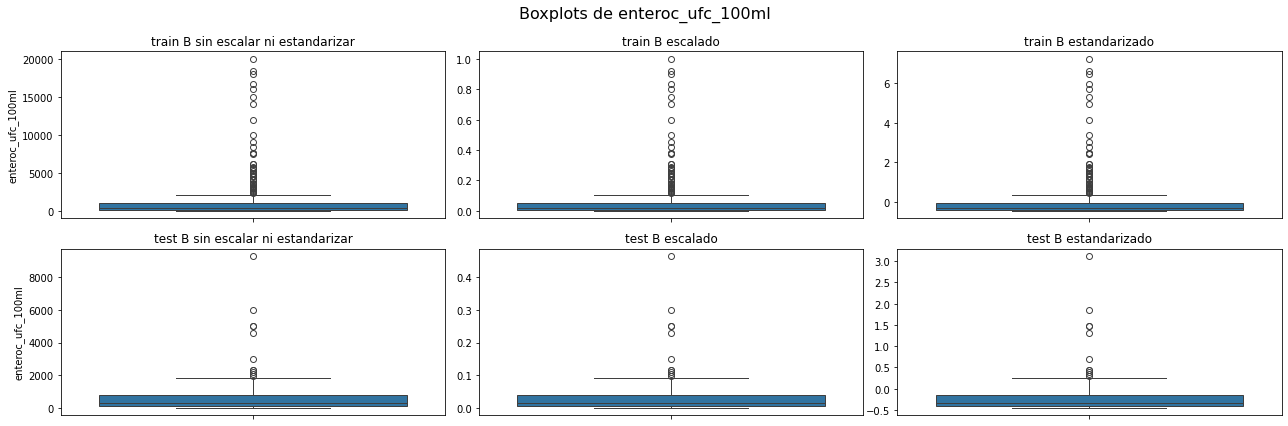

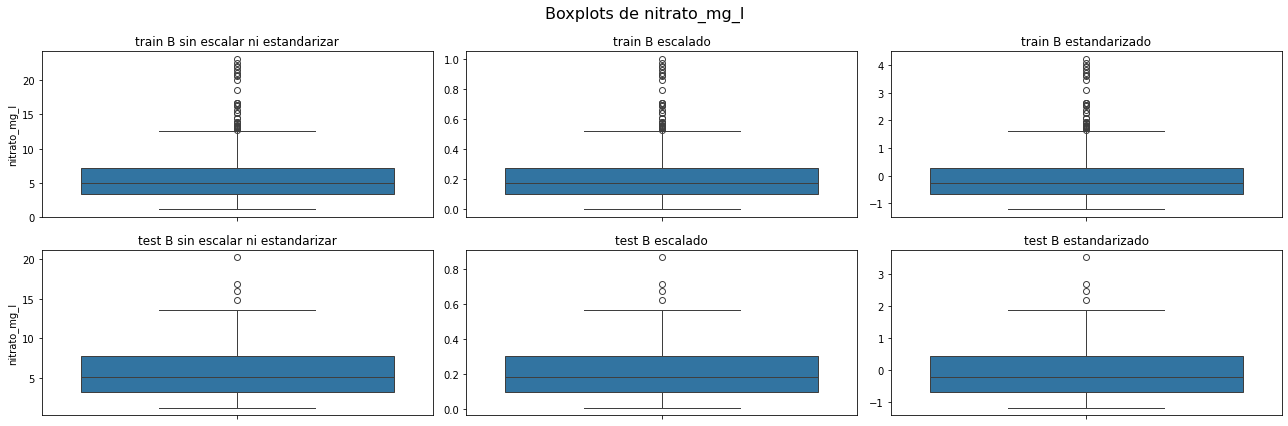

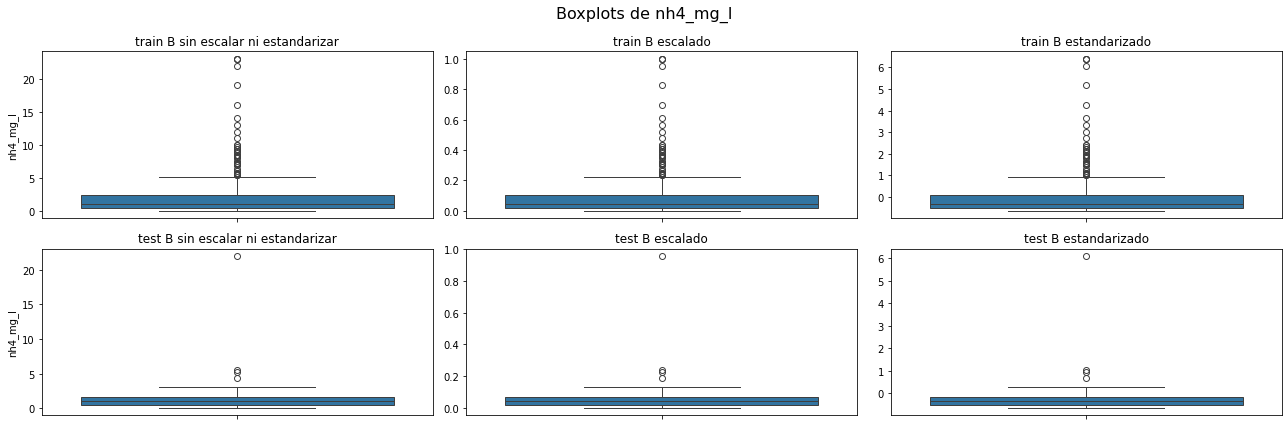

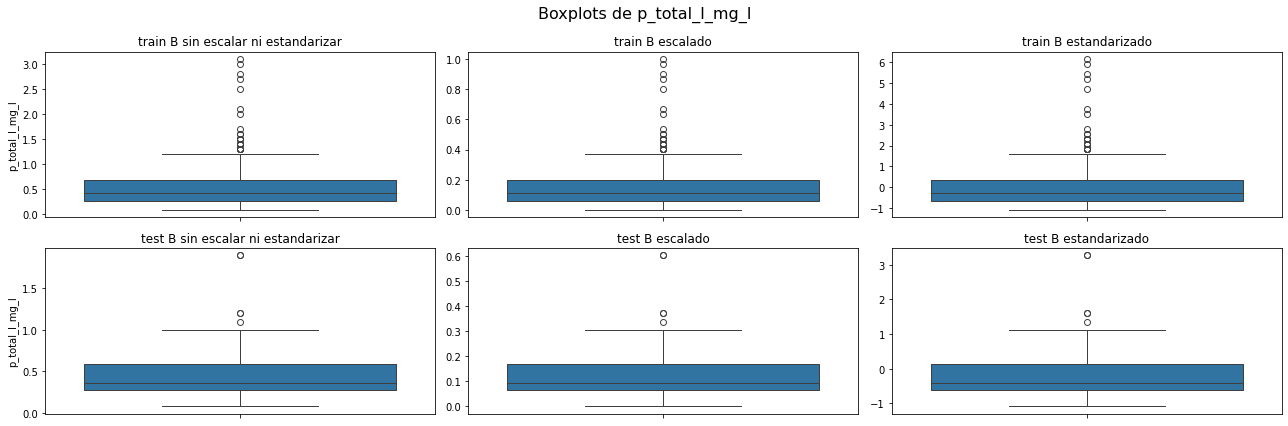

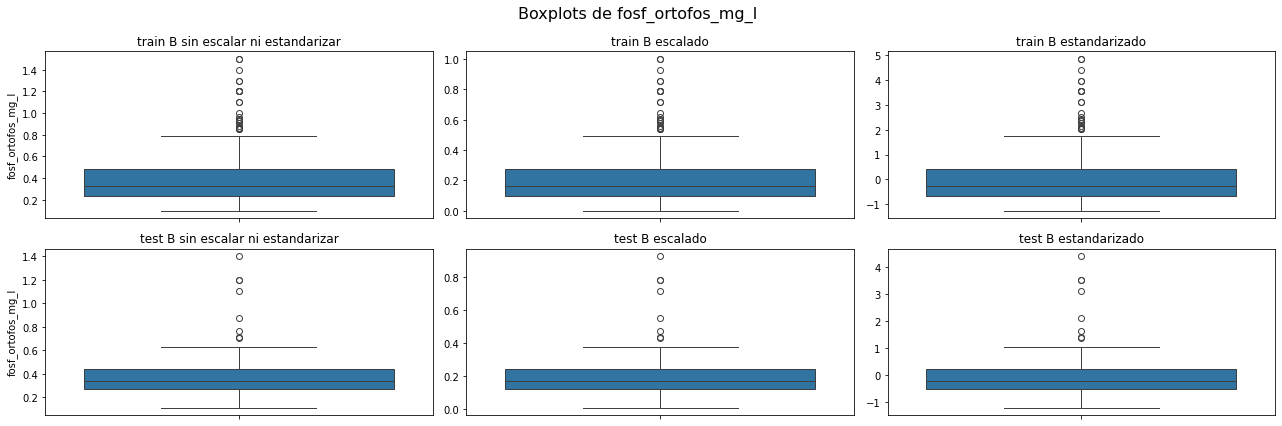

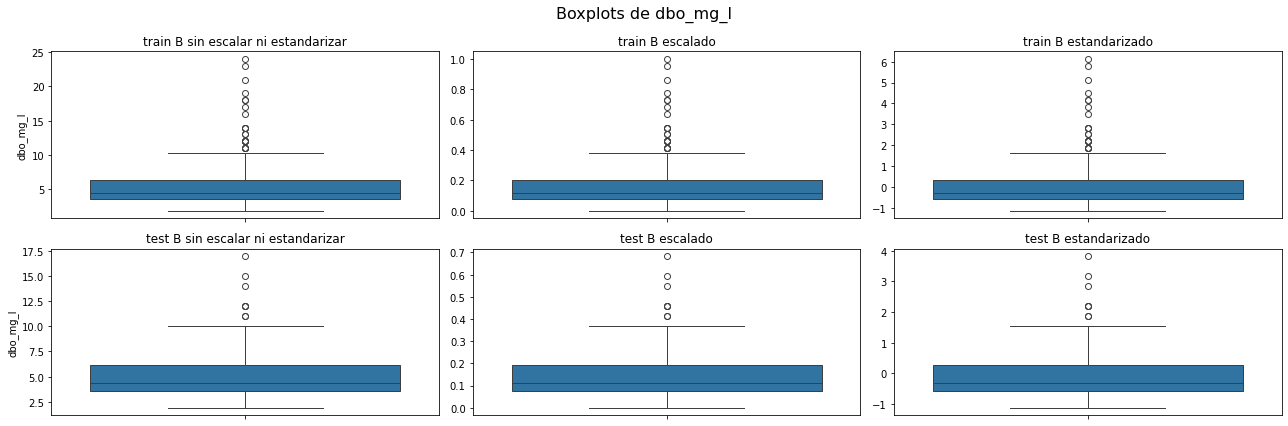

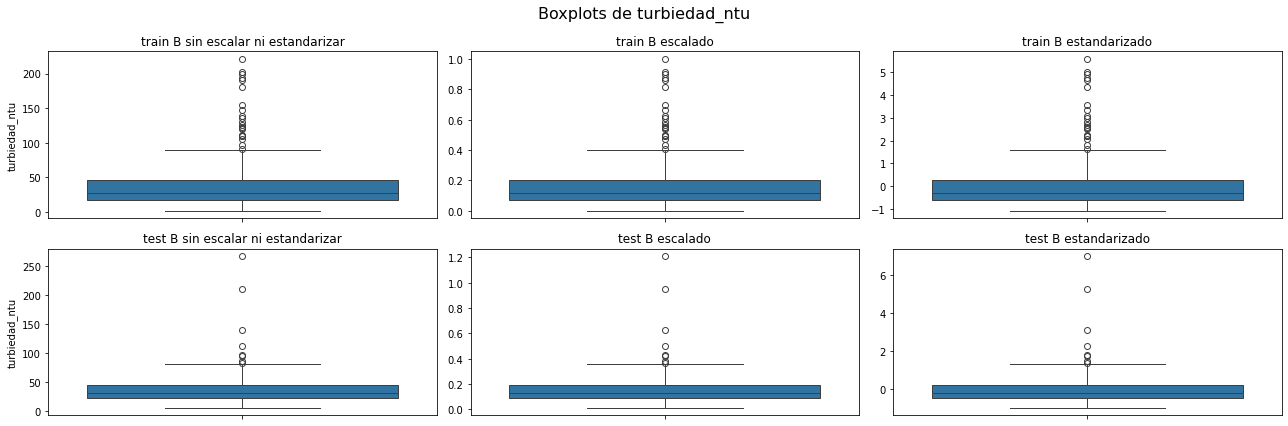

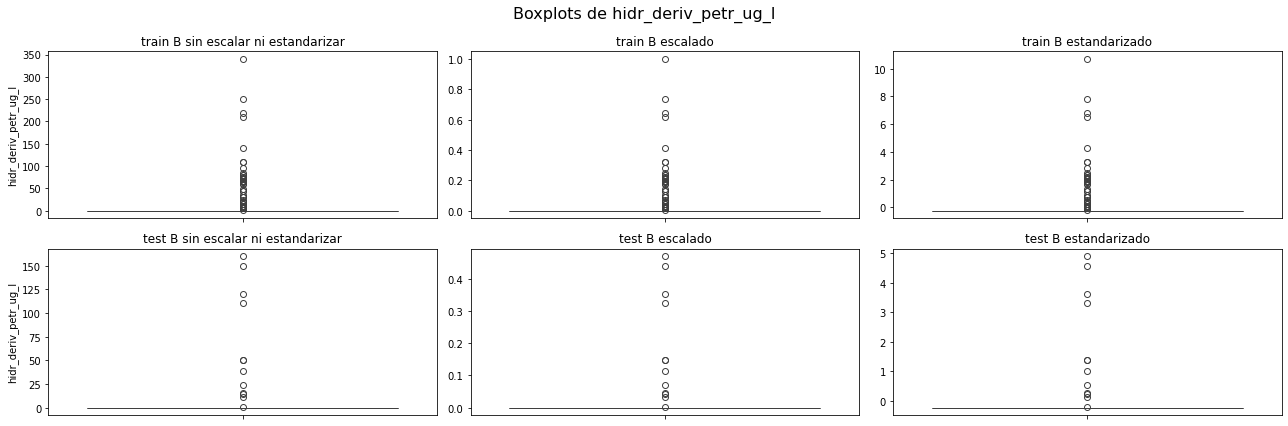

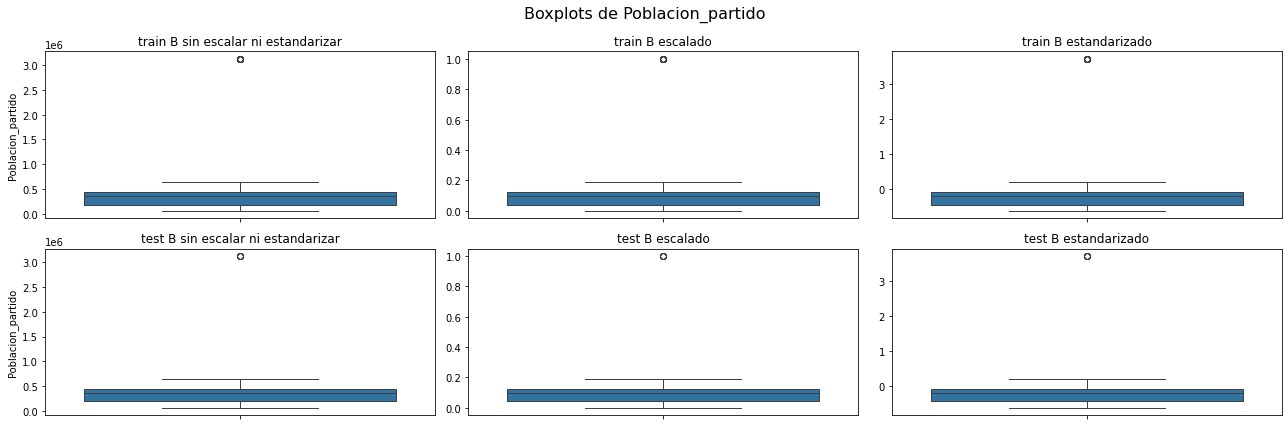

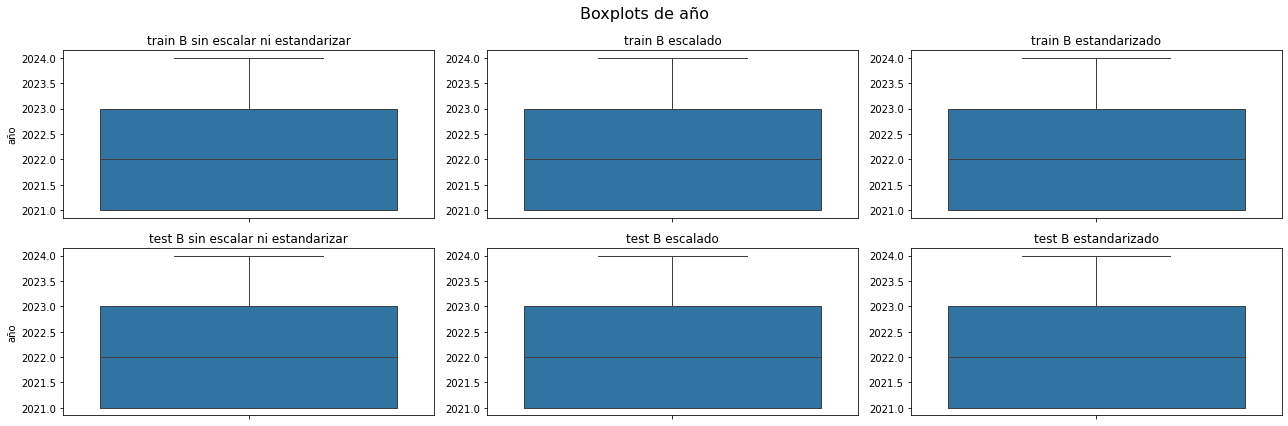

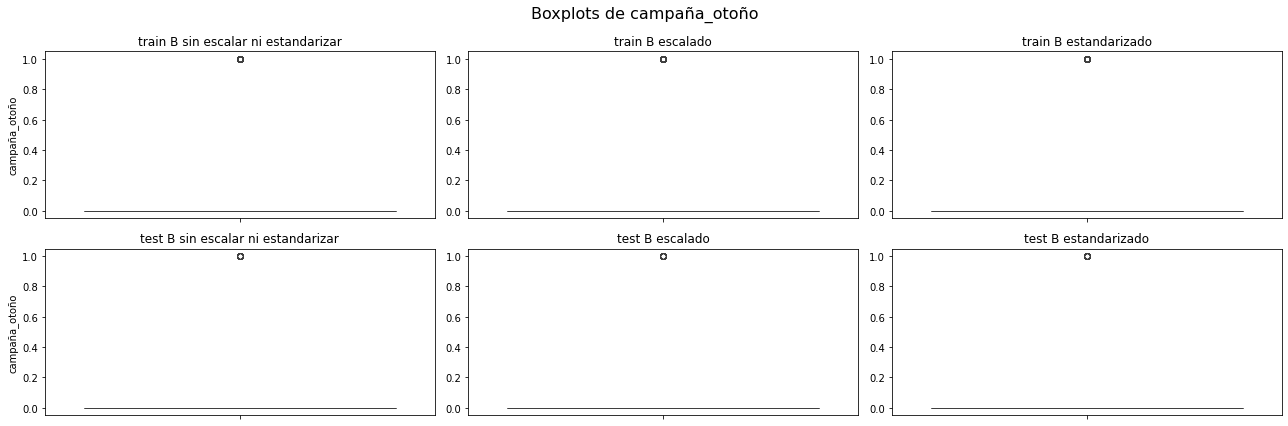

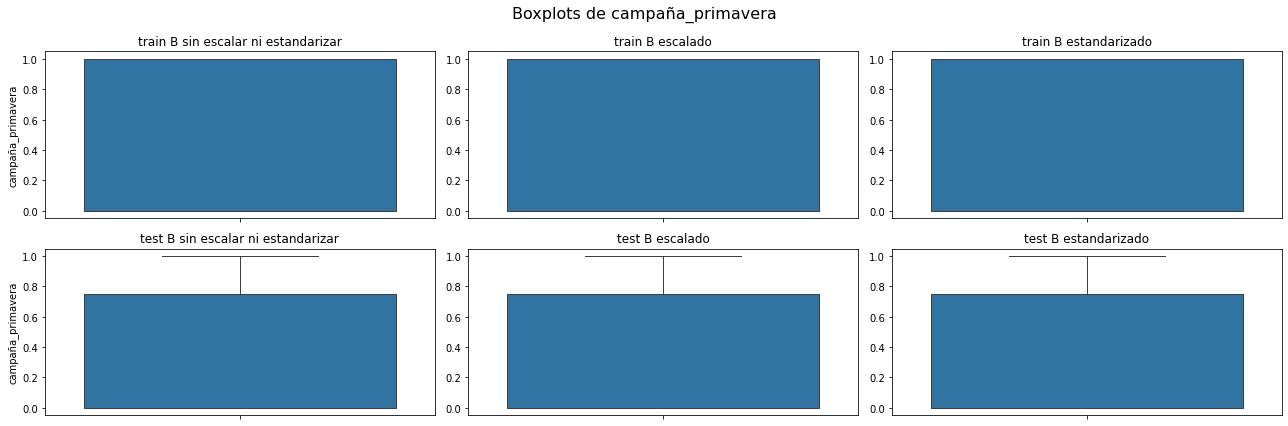

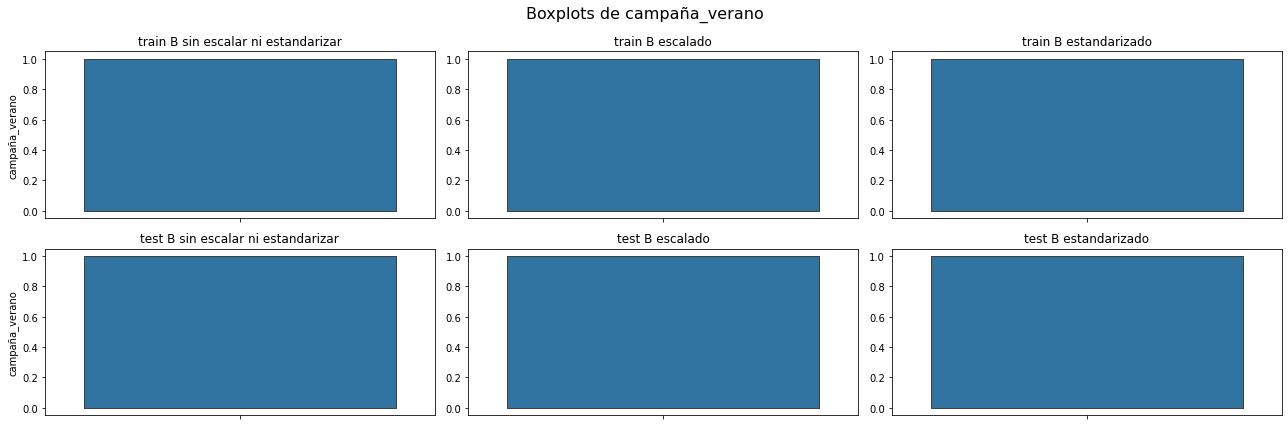

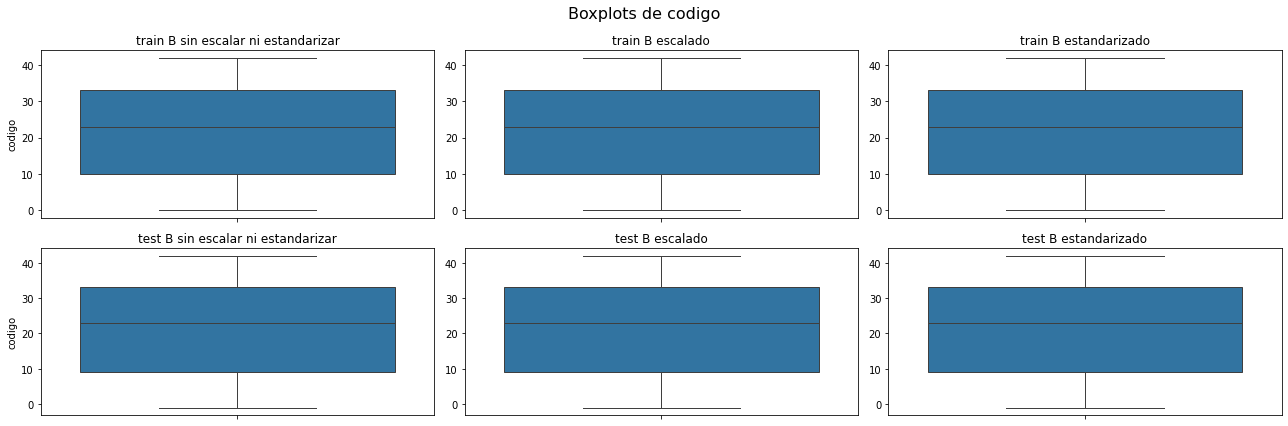

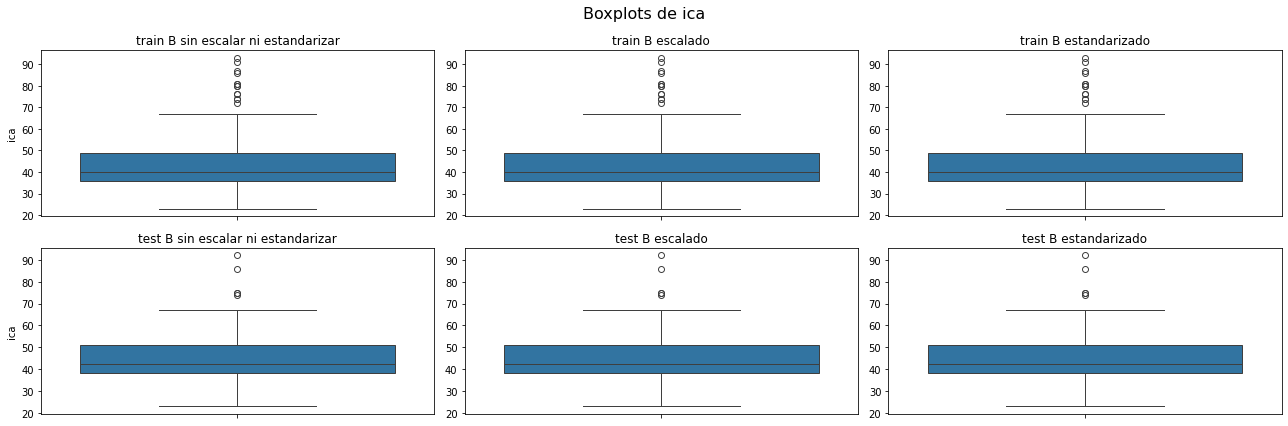

In [30]:
## Veamos boxplots para datasets B
boxplots(datasets_B, cols_B, 2, 3)